In [1]:
%load_ext autoreload
%autoreload 2
import LCN_model
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from tqdm import tqdm

## Schoups vs Ghose – Phase pooling

In [2]:
np.random.seed(0)
torch.manual_seed(0)

schoups_net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.01, rescale = 10)
# schoups_net.to(schoups_net.device)
schoups_net.transfer_inputting(-np.pi/18, np.pi/18, 11, 11, random_sf = False)
schoups_net.desired_outputting()
optimizer = optim.SGD(schoups_net.parameters(), lr = schoups_net.alpha)
schoups_net.train(5000, optimizer)

np.random.seed(0)
torch.manual_seed(0)

ghose_net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.01, rescale = 50)
# ghose_net.to(ghose_net.device)
ghose_net.transfer_inputting(-np.pi/18, np.pi/18, 11, 11, random_sf = False)
ghose_net.desired_outputting()
optimizer = optim.SGD(ghose_net.parameters(), lr = ghose_net.alpha)
ghose_net.train(5000, optimizer)

100%|██████████| 100/100 [05:00<00:00,  3.01s/it]


In [69]:
torch.save(schoups_net.state_dict(), "Schoups_32_orientations_model.pt")
torch.save(schoups_net.losses, "Schoups_32_orientations_model_loss.pt")
torch.save(schoups_net.training_scores, "Schoups_32_orientations_model_performance.pt")
torch.save(schoups_net.v1_weight_changes, "Schoups_32_orientations_model_v1_weight_change.pt")
torch.save(schoups_net.v4_weight_changes, "Schoups_32_orientations_model_v4_weight_change.pt")
torch.save(schoups_net.decision_weight_changes, "Schoups_32_orientations_model_decision_weight_change.pt")
torch.save(schoups_net.angle1, "Schoups_32_orientations_model_angle1.pt")
torch.save(schoups_net.angle2, "Schoups_32_orientations_model_angle2.pt")
torch.save(schoups_net.train_x_location, "Schoups_32_orientations_model_x_location.pt")
torch.save(schoups_net.train_y_location, "Schoups_32_orientations_model_y_location.pt")
torch.save(schoups_net.generalize_perform, "Schoups_32_orientations_model_generalization_performance.pt")
torch.save(schoups_net.generalize_error, "Schoups_32_orientations_model_generalization_error.pt")
torch.save(schoups_net.trained_phis, "Schoups_32_orientations_model_phases.pt")
torch.save(schoups_net.trained_sfs, "Schoups_32_orientations_model_sfs.pt")
torch.save(schoups_net.v1_angles, "Schoups_32_orientations_model_v1_angles.pt")

torch.save(ghose_net.state_dict(), "Ghose_32_orientations_model.pt")
torch.save(ghose_net.losses, "Ghose_32_orientations_model_loss.pt")
torch.save(ghose_net.training_scores, "Ghose_32_orientations_model_performance.pt")
torch.save(ghose_net.v1_weight_changes, "Ghose_32_orientations_model_v1_weight_change.pt")
torch.save(ghose_net.v4_weight_changes, "Ghose_32_orientations_model_v4_weight_change.pt")
torch.save(ghose_net.decision_weight_changes, "Ghose_32_orientations_model_decision_weight_change.pt")
torch.save(ghose_net.angle1, "Ghose_32_orientations_model_angle1.pt")
torch.save(ghose_net.angle2, "Ghose_32_orientations_model_angle2.pt")
torch.save(ghose_net.train_x_location, "Ghose_32_orientations_model_x_location.pt")
torch.save(ghose_net.train_y_location, "Ghose_32_orientations_model_y_location.pt")
torch.save(ghose_net.generalize_perform, "Ghose_32_orientations_model_generalization_performance.pt")
torch.save(ghose_net.generalize_error, "Ghose_32_orientations_model_generalization_error.pt")
torch.save(ghose_net.trained_phis, "Ghose_32_orientations_model_phases.pt")
torch.save(ghose_net.trained_sfs, "Ghose_32_orientations_model_sfs.pt")
torch.save(ghose_net.v1_angles, "Ghose_32_orientations_model_v1_angles.pt")

In [2]:
v1_weight_scale = 0.5
phase_weight_scale = 0.01
v4_weight_scale = 1
model = 'weight_scale_' + str(v1_weight_scale).replace('.', '') + '_001_' + str(v4_weight_scale).replace('.', '')
savepath = "./trained_models/automated/" + model + "/Schoups_32_orientations_model_"
# savepath = "Schoups_32_orientations_model_"
np.random.seed(0)
torch.manual_seed(0)

schoups_net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.01, 
    v1_rescale = v1_weight_scale, phase_rescale = phase_weight_scale, v4_rescale = v4_weight_scale)
schoups_net.load_state_dict(torch.load(savepath[:-1] + ".pt"))
schoups_net.losses = torch.load(savepath + "loss.pt")
schoups_net.training_scores = torch.load(savepath + "performance.pt")
schoups_net.v1_weight_changes = torch.load(savepath + "v1_weight_change.pt")
schoups_net.v4_weight_changes = torch.load(savepath + "v4_weight_change.pt")
schoups_net.decision_weight_changes = torch.load(savepath + "decision_weight_change.pt")
schoups_net.angle1 = torch.load(savepath + "angle1.pt")
schoups_net.angle2 = torch.load(savepath + "angle2.pt")
schoups_net.train_x_location = torch.load(savepath + "x_location.pt")
schoups_net.train_y_location = torch.load(savepath + "y_location.pt")
schoups_net.generalize_perform = torch.load(savepath + "generalization_performance.pt")
schoups_net.generalize_error = torch.load(savepath + "generalization_error.pt")
schoups_net.trained_phis = torch.load(savepath + "phases.pt")
schoups_net.trained_sfs = torch.load(savepath + "sfs.pt")
schoups_net.v1_angles = torch.load(savepath + "v1_angles.pt")
schoups_net.v1_tuning_curve()
schoups_net.v4_tuning_curve()


# model = "weight_scale05_low"
# savepath = "./trained_models/" + model + "/Ghose_32_orientations_model_"

# np.random.seed(0)
# torch.manual_seed(0)

# ghose_net = LCN_model.LCN(
#     input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
#     v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
# ghose_net.load_state_dict(torch.load(savepath + ".pt"))
# ghose_net.losses = torch.load(savepath + "loss.pt")
# ghose_net.training_scores = torch.load(savepath + "performance.pt")
# ghose_net.v1_weight_changes = torch.load(savepath + "v1_weight_change.pt")
# ghose_net.v4_weight_changes = torch.load(savepath + "v4_weight_change.pt")
# ghose_net.decision_weight_changes = torch.load(savepath + "decision_weight_change.pt")
# ghose_net.angle1 = torch.load(savepath + "angle1.pt")
# ghose_net.angle2 = torch.load(savepath + "angle2.pt")
# ghose_net.train_x_location = torch.load(savepath + "x_location.pt")
# ghose_net.train_y_location = torch.load(savepath + "y_location.pt")
# ghose_net.generalize_perform = torch.load(savepath + "generalization_performance.pt")
# ghose_net.generalize_error = torch.load(savepath + "generalization_error.pt")
# ghose_net.trained_phis = torch.load(savepath + "phases.pt")
# ghose_net.trained_sfs = torch.load(savepath + "sfs.pt")
# ghose_net.v1_angles = torch.load(savepath + "v1_angles.pt")
# ghose_net.v1_tuning_curve()
# ghose_net.v4_tuning_curve()

100%|██████████| 100/100 [05:29<00:00,  3.30s/it]


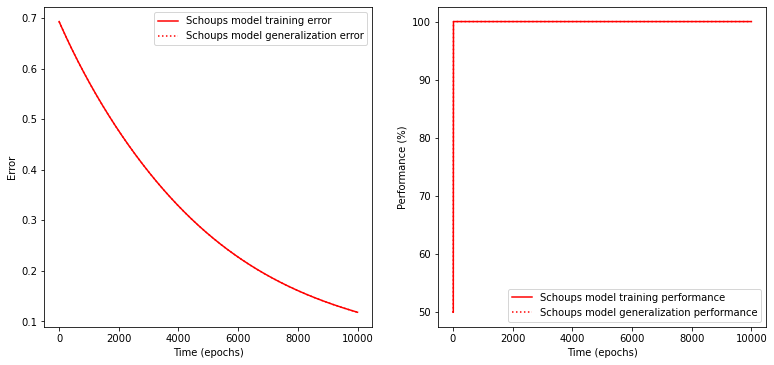

In [3]:
plt.figure(figsize = [20, 20])
plt.subplot(3, 3, 1)
schoups_net.plot_training_error('red')
schoups_net.plot_generalization_error('red')
# ghose_net.plot_training_error('blue')
# ghose_net.plot_generalization_error('blue')
plt.legend(["Schoups model training error", "Schoups model generalization error", "Ghose model training error", 
            "Ghose model generalization error"]);
# plt.title("Training and generalization for Schoups and Ghose model", loc = "left")

plt.subplot(3, 3, 2)
schoups_net.plot_training_performance('red')
schoups_net.plot_generalization_performance('red')
# ghose_net.plot_training_performance('blue')
# ghose_net.plot_generalization_performance('blue')
plt.legend(["Schoups model training performance", "Schoups model generalization performance", 
            "Ghose model training performance", "Ghose model generalization performance"]);



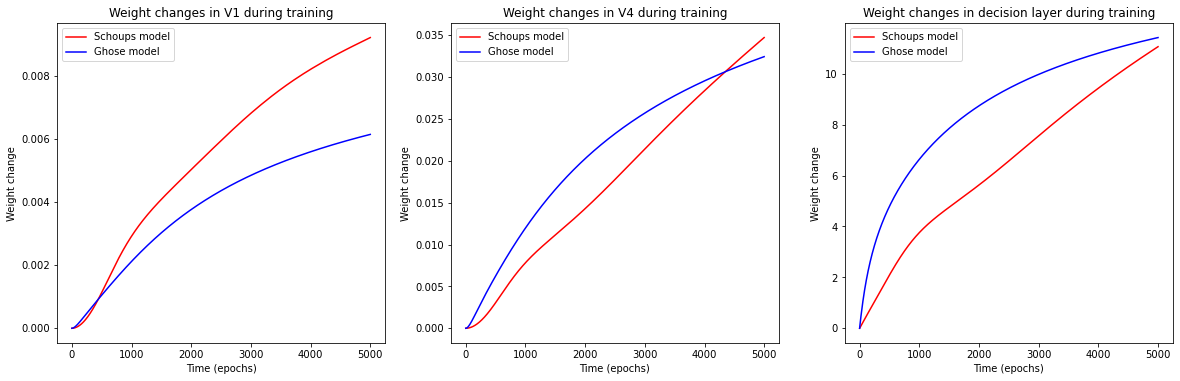

In [4]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)

schoups_net.plot_weight_change('red', v1 = True)
ghose_net.plot_weight_change('blue', v1 = True)
plt.legend(["Schoups model", "Ghose model"]);

plt.subplot(3, 3, 2)
schoups_net.plot_weight_change('red', v4 = True)
ghose_net.plot_weight_change('blue', v4 = True)
plt.legend(["Schoups model", "Ghose model"]);

plt.subplot(3, 3, 3)
schoups_net.plot_weight_change('red', decision = True)
ghose_net.plot_weight_change('blue', decision = True)
plt.legend(["Schoups model", "Ghose model"]);

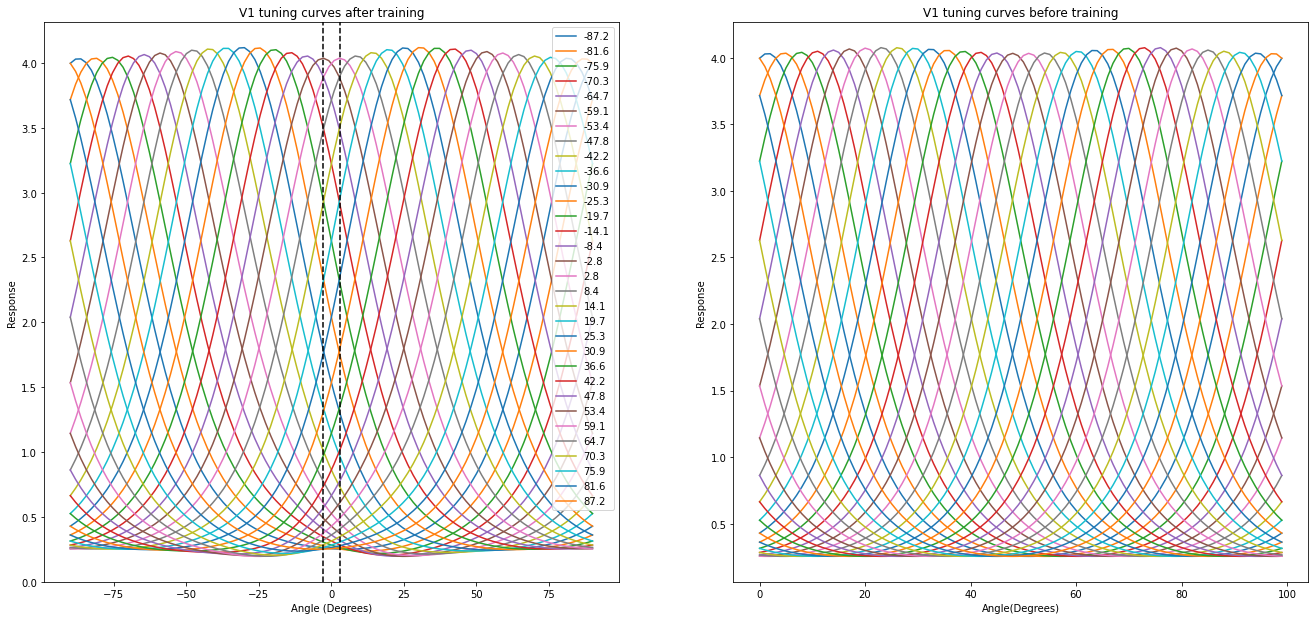

In [7]:
plt.figure(figsize = [35, 35])
difference = False
plt.subplot(3, 3, 1)
schoups_net.plot_v1_tuning_curve(orientation = 3, phi_sf = 0, position = 11, orientations = True, differences = difference);
plt.axvline(schoups_net.angle1 * 180/np.pi, 0, 1, linestyle = 'dashed', color = 'black');
plt.axvline(schoups_net.angle2 * 180/np.pi, 0, 1, linestyle = 'dashed', color = 'black');
plt.title("V1 tuning curves after training")

plt.subplot(3, 3, 2)
for i in range(32):
    plt.plot(schoups_net.initial_tuning_curves[i, 0, 11, 11, :])
plt.title("V1 tuning curves before training")
plt.xlabel("Angle(Degrees)")
plt.ylabel("Response");
# ghose_net.plot_v1_tuning_curve(orientation = 3, phi_sf = 0, position = 11, orientations = True, differences = difference)

NameError: name 'ghose_net' is not defined

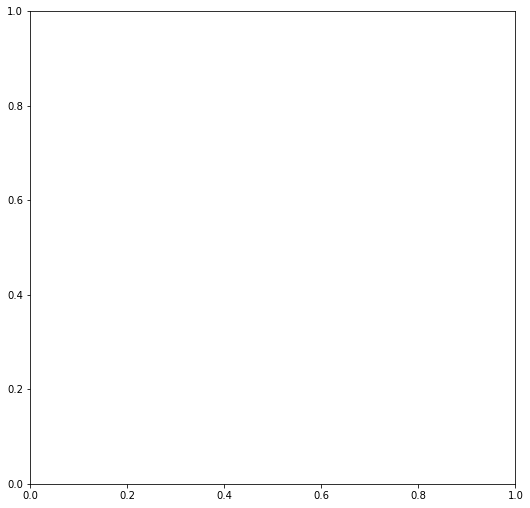

In [13]:
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
plt.bar(["Schoups model", "Ghose model"], [schoups_net.v1_amplitude_difference, ghose_net.v1_amplitude_difference], color = "black");
plt.ylabel("% increase of amplitude");
plt.title("Change in amplitude for V1 tuning curves");

plt.subplot(4, 4, 2)
plt.bar(["Schoups model", "Ghose model"], [schoups_net.v1_bandwidth_difference, ghose_net.v1_bandwidth_difference], color = "black");
plt.ylabel("% increase of bandwidth");
plt.title("Change in bandwidth for V1 tuning curves");


Text(0, 0.5, 'Response')

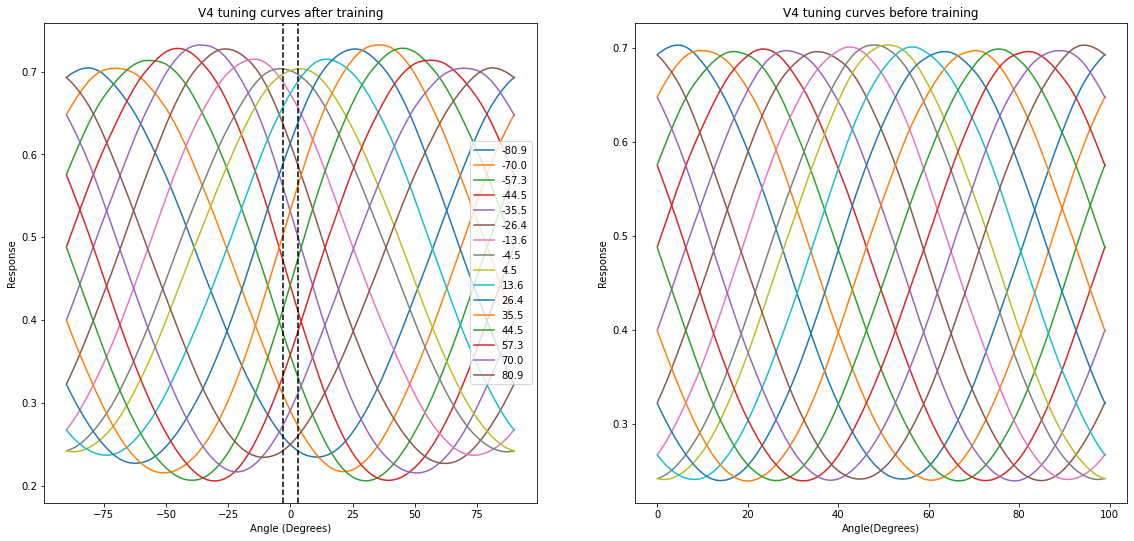

In [6]:
plt.figure(figsize = [30, 30])
difference = False

plt.subplot(3, 3, 1)
schoups_net.plot_v4_tuning_curve(position = 1, differences = difference)
plt.axvline(schoups_net.angle1 * 180/np.pi, 0, 1, linestyle = 'dashed', color = 'black');
plt.axvline(schoups_net.angle2 * 180/np.pi, 0, 1, linestyle = 'dashed', color = 'black');
plt.title("V4 tuning curves after training")

plt.subplot(3, 3, 2)
for i in range(16):
    plt.plot(schoups_net.v4_initial_tuning_curves[i, 1, 1, :])

plt.title("V4 tuning curves before training")
plt.xlabel("Angle(Degrees)")
plt.ylabel("Response")
# ghose_net.plot_v4_tuning_curve(position = 1, differences = difference)


AttributeError: 'LCN' object has no attribute 'v4_amplitude_difference'

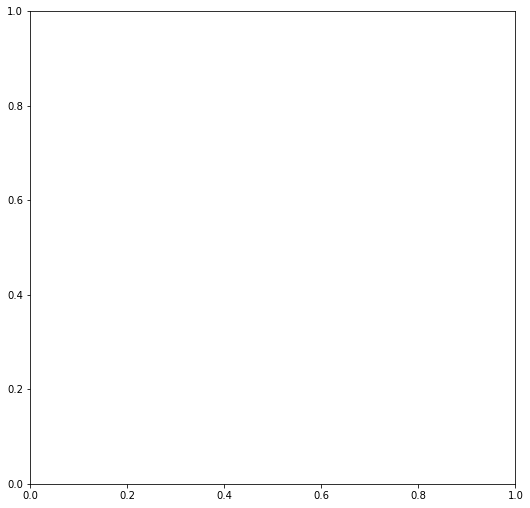

In [81]:
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
plt.bar(["Schoups model", "Ghose model"], [
    schoups_net.v4_amplitude_difference, ghose_net.v4_amplitude_difference], color = "black");
plt.ylabel("% increase of amplitude");
plt.title("Change in amplitude for V4 tuning curves");

plt.subplot(4, 4, 2)
plt.bar(["Schoups model", "Ghose model"], [
    schoups_net.v4_bandwidth_difference, ghose_net.v4_bandwidth_difference], color = "black");
plt.ylabel("% increase of bandwidth");
plt.title("Change in bandwidth for V4 tuning curves");

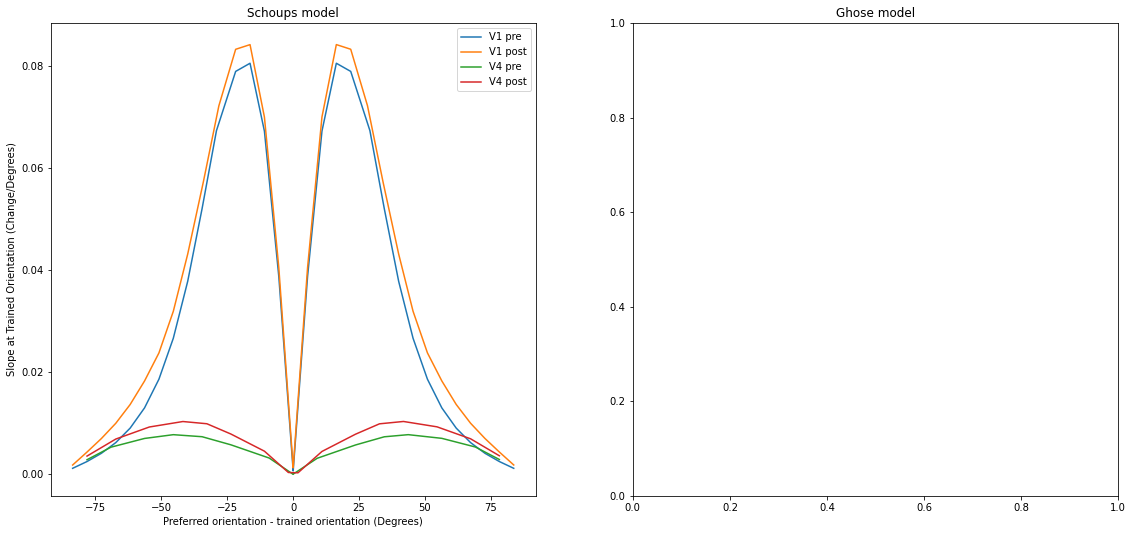

In [5]:
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
schoups_net.otc_curve(v1_position = 11, v4_position = 1)
schoups_net.plot_otc_curve()
plt.title("Schoups model");

plt.subplot(4, 4, 2)
# ghose_net.otc_curve(v1_position = 11, v4_position = 1)
# ghose_net.plot_otc_curve()
plt.title("Ghose model");


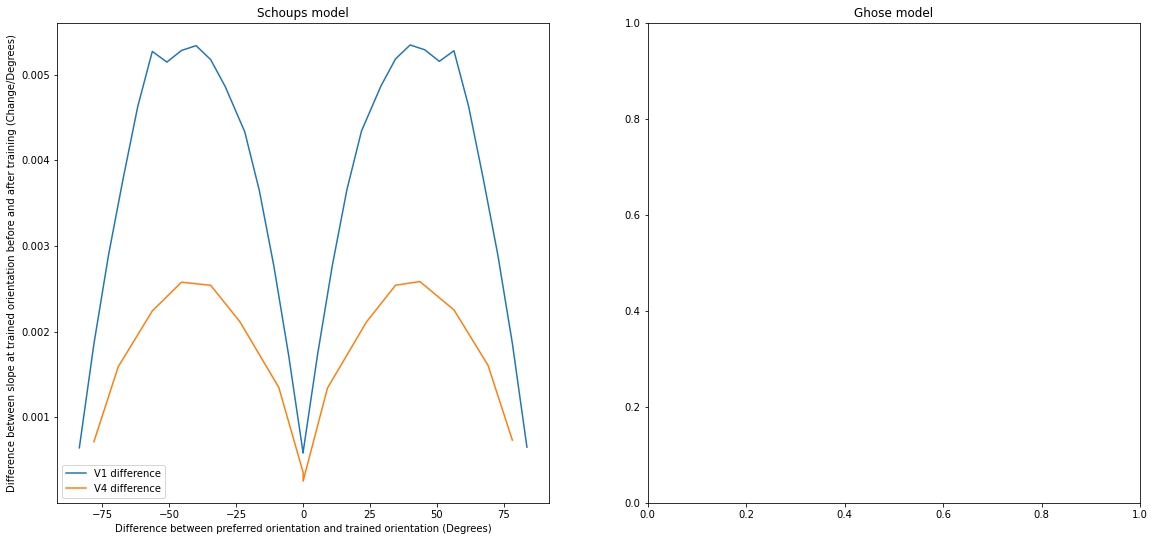

In [8]:
plt.figure(figsize = [30, 30])
plt.subplot(3, 3, 1)
schoups_net.plot_otc_curve_diff(absolute_diff = False)
plt.title("Schoups model");

plt.subplot(3, 3, 2)
# ghose_net.plot_otc_curve_diff(absolute_diff = False)
plt.title("Ghose model");

100%|██████████| 23/23 [00:55<00:00,  2.40s/it]


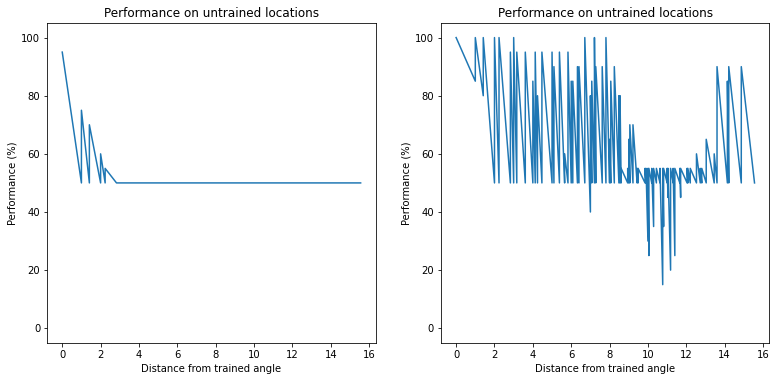

In [27]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)
np.random.seed(0)
torch.manual_seed(0)
schoups_net.plot_transfer_score(performance = True, grid = False)

plt.subplot(3, 3, 2)
np.random.seed(0)
torch.manual_seed(0)
ghose_net.plot_transfer_score(performance = True, grid = False)


100%|██████████| 23/23 [00:55<00:00,  2.40s/it]


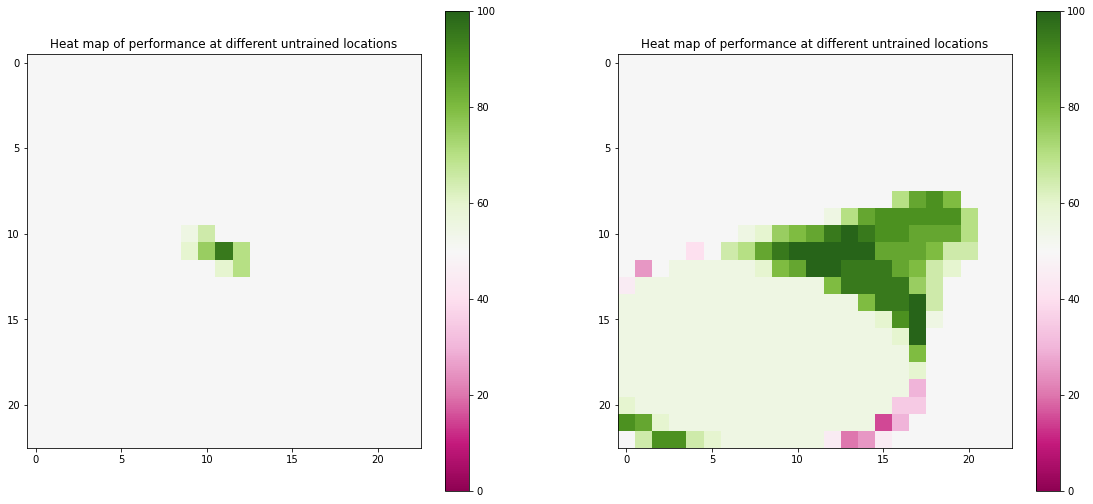

In [32]:
plt.figure(figsize = [30, 30])

plt.subplot(3, 3, 1)
np.random.seed(0)
torch.manual_seed(0)
schoups_net.plot_transfer_score(20, performance = True, grid = True)

plt.subplot(3, 3, 2)
np.random.seed(0)
torch.manual_seed(0)
ghose_net.plot_transfer_score(20, performance = True, grid = True)


tensor([[ 0.0275, -0.0074,  0.0368,  ...,  0.0048, -0.0026,  0.0009],
        [ 0.0041, -0.0498, -0.0153,  ..., -0.0060,  0.0234,  0.0365],
        [ 0.0046,  0.0188,  0.0452,  ..., -0.0147,  0.0075,  0.0037],
        ...,
        [ 0.0114, -0.0311,  0.0098,  ..., -0.0161,  0.0309, -0.0277],
        [-0.0196, -0.0414, -0.0088,  ...,  0.0225,  0.0249, -0.0637],
        [-0.0249,  0.0581, -0.0183,  ...,  0.0188,  0.0054, -0.0863]]) tensor([[ 0.0275, -0.0074,  0.0368,  ...,  0.0048, -0.0026,  0.0009],
        [ 0.0041, -0.0498, -0.0153,  ..., -0.0060,  0.0234,  0.0365],
        [ 0.0046,  0.0188,  0.0452,  ..., -0.0147,  0.0075,  0.0037],
        ...,
        [ 0.0114, -0.0311,  0.0098,  ..., -0.0161,  0.0309, -0.0277],
        [-0.0196, -0.0414, -0.0088,  ...,  0.0225,  0.0249, -0.0637],
        [-0.0249,  0.0581, -0.0183,  ...,  0.0188,  0.0054, -0.0863]])
tensor([[-0.6378,  0.7155]], grad_fn=<AddmmBackward>) tensor(1)
tensor([[-0.9559,  1.0336]], grad_fn=<AddmmBackward>) tensor(1)


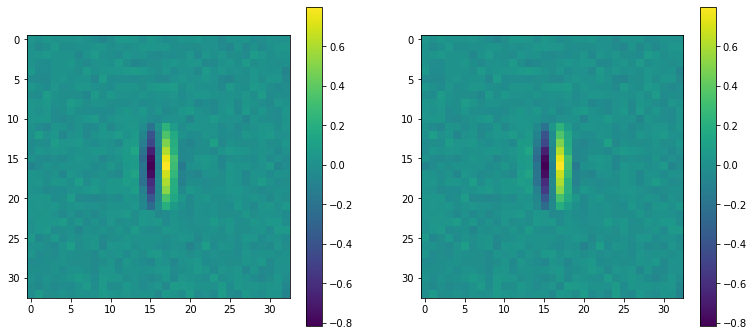

In [144]:
np.random.seed(0)
torch.manual_seed(0)
i = 11
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
a = schoups_net.transfer_inputting(-np.pi/360, np.pi/360, 11, 11, random_sf = False)[i][0]
plt.imshow(a)
plt.colorbar()

np.random.seed(0)
torch.manual_seed(0)
for v in range(i+1):
    phi = np.random.uniform(0, np.pi)


plt.subplot(3, 3, 2)
kernel = schoups_net.generate_gabor(11, -np.pi/360, phi, 5, random_sf = False).view(11, 11)
for k in range(i+1):
    kernel_noise = torch.normal(0, 0.03, (33, 33))


for i in range(11):
    for j in range(11):
        kernel_noise[i + 11][j + 11] = kernel[i][j] + kernel_noise[i + 11][j + 11]
plt.imshow(kernel_noise.view(33, 33))


plt.colorbar()
print(a, kernel_noise)
print(schoups_net.forward(a.view(1, 1, 33, 33)), torch.argmax(schoups_net.forward(a.view(1, 1, 33, 33))))
print(schoups_net.forward(kernel_noise.view(1, 1, 33, 33)), torch.argmax(schoups_net.forward(kernel_noise.view(1, 1, 33, 33))))


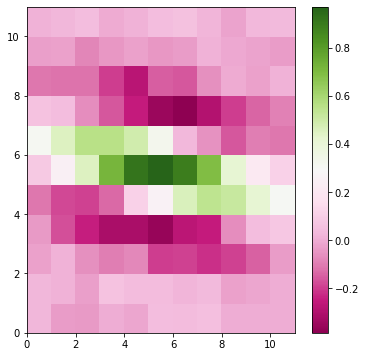

In [102]:
plt.figure(figsize = [6, 6])
plt.pcolormesh(schoups_net.before_v1weight.view(128, 23, 23, 121)[120, 0, 0, :].view(11, 11).detach().numpy(), cmap = 'PiYG')
plt.colorbar()

In [6]:
test = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
test.v1_tuning_curve()

100%|██████████| 100/100 [05:27<00:00,  3.27s/it]


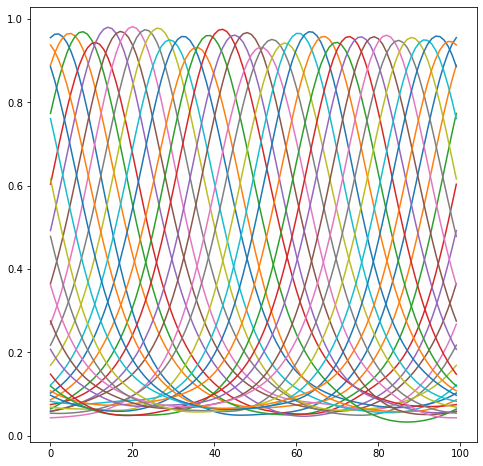

In [7]:
plt.figure(figsize = [8, 8])
for i in range(32):
    plt.plot(test.initial_tuning_curves[i, 0, 12, 12, :])


-85.9090909090909 0.00043742301932070404
-80.45454545454545 0.0010109594732057303
-74.54545454545455 0.0007167137882788666
-69.0909090909091 0.002186964586144313
-63.636363636363626 0.0026241783634759486
-58.18181818181819 0.003669830155558884
-52.72727272727273 0.005162186687812209
-47.27272727272727 0.007158456020988524
-41.81818181818182 0.010598203865811229
-35.45454545454545 0.015296672703698277
-30.0 0.0195247083902359
-23.636363636363637 0.023122564889490604
-18.181818181818176 0.02529909275472164
-12.72727272727273 0.023060317616909742
-7.272727272727271 0.01578766480088234
-1.8181818181818117 0.0044033098965883255
1.8181818181818117 0.004080558835994452
7.727272727272723 0.015782660339027643
12.727272727272718 0.022895763162523508
18.636363636363633 0.025158599484711885
24.54545454545454 0.023287943098694086
30.454545454545457 0.01927524246275425
35.90909090909091 0.014144846936687827
41.36363636363635 0.01042974810115993
47.27272727272726 0.007819353602826595
52.2727272727272

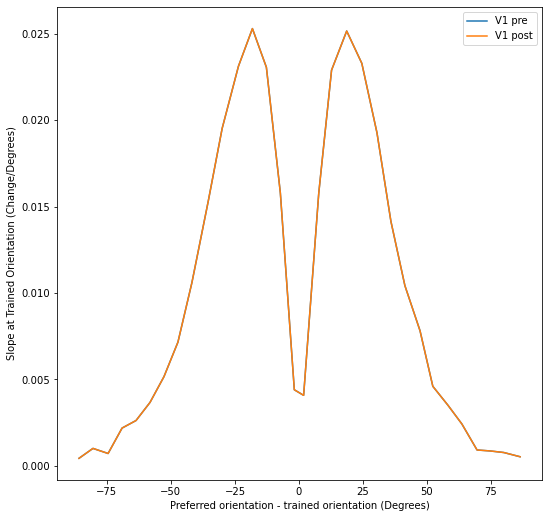

In [8]:
plt.figure(figsize = [40, 40])

test.angle1 = -np.pi/180
test.angle2 = np.pi/180

plt.subplot(4, 4, 1)
test.otc_curve(v1_position = 11, v4_position = 1)
test.plot_otc_curve()


## Fixed vs random SF

In [8]:
np.random.seed(0)
torch.manual_seed(0)

fixed_net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
fixed_net.transfer_inputting(-np.pi/18, np.pi/18, 11, 11, random_sf = False)
fixed_net.desired_outputting()
optimizer = optim.SGD(fixed_net.parameters(), lr = fixed_net.alpha)
fixed_net.train(2000, optimizer)

np.random.seed(0)
torch.manual_seed(0)

random_net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
random_net.transfer_inputting(-np.pi/18, np.pi/18, 11, 11, random_sf = True)
random_net.desired_outputting()
optimizer = optim.SGD(random_net.parameters(), lr = random_net.alpha)
random_net.train(2000, optimizer)

100%|██████████| 100/100 [05:11<00:00,  3.12s/it]


In [37]:
torch.save(fixed_net.state_dict(), "Fixed_sf_low_precision_phase_pool_model.pt")
torch.save(fixed_net.losses, "Fixed_sf_low_precision_phase_pool_model_loss.pt")
torch.save(fixed_net.training_scores, "Fixed_sf_low_precision_phase_pool_model_performance.pt")
torch.save(fixed_net.v1_weight_changes, "Fixed_sf_low_precision_phase_pool_model_v1_weight_change.pt")
torch.save(fixed_net.v4_weight_changes, "Fixed_sf_low_precision_phase_pool_model_v4_weight_change.pt")
torch.save(fixed_net.decision_weight_changes, "Fixed_sf_low_precision_phase_pool_model_decision_weight_change.pt")
torch.save(fixed_net.angle1, "Fixed_sf_low_precision_phase_pool_model_angle1.pt")
torch.save(fixed_net.angle2, "Fixed_sf_low_precision_phase_pool_model_angle2.pt")
torch.save(fixed_net.train_x_location, "Fixed_sf_low_precision_phase_pool_model_x_location.pt")
torch.save(fixed_net.train_y_location, "Fixed_sf_low_precision_phase_pool_model_y_location.pt")
torch.save(fixed_net.generalize_perform, "Fixed_sf_low_precision_phase_pool_model_generalization_performance.pt")
torch.save(fixed_net.generalize_error, "Fixed_sf_low_precision_phase_pool_model_generalization_error.pt")
torch.save(fixed_net.trained_phis, "Fixed_sf_low_precision_phase_pool_model_phases.pt")
torch.save(fixed_net.trained_sfs, "Fixed_sf_low_precision_phase_pool_model_sfs.pt")
torch.save(fixed_net.v1_angles, "Fixed_sf_low_precision_phase_pool_model_v1_angles.pt")


torch.save(random_net.state_dict(), "Random_sf_low_precision_phase_pool_model.pt")
torch.save(random_net.losses, "Random_sf_low_precision_phase_pool_model_loss.pt")
torch.save(random_net.training_scores, "Random_sf_low_precision_phase_pool_model_performance.pt")
torch.save(random_net.v1_weight_changes, "Random_sf_low_precision_phase_pool_model_v1_weight_change.pt")
torch.save(random_net.v4_weight_changes, "Random_sf_low_precision_phase_pool_model_v4_weight_change.pt")
torch.save(random_net.decision_weight_changes, "Random_sf_low_precision_phase_pool_model_decision_weight_change.pt")
torch.save(random_net.angle1, "Random_sf_low_precision_phase_pool_model_angle1.pt")
torch.save(random_net.angle2, "Random_sf_low_precision_phase_pool_model_angle2.pt")
torch.save(random_net.train_x_location, "Random_sf_low_precision_phase_pool_model_x_location.pt")
torch.save(random_net.train_y_location, "Random_sf_low_precision_phase_pool_model_y_location.pt")
torch.save(random_net.generalize_perform, "Random_sf_low_precision_phase_pool_model_generalization_performance.pt")
torch.save(random_net.generalize_error, "Random_sf_low_precision_phase_pool_model_generalization_error.pt")
torch.save(random_net.trained_phis, "Random_sf_low_precision_phase_pool_model_phases.pt")
torch.save(random_net.trained_sfs, "Random_sf_low_precision_phase_pool_model_sfs.pt")
torch.save(random_net.v1_angles, "Random_sf_low_precision_phase_pool_model_v1_angles.pt")

In [55]:
np.random.seed(0)
torch.manual_seed(0)

fixed_net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
fixed_net.load_state_dict(torch.load("Fixed_sf_low_precision_phase_pool_model.pt"))
fixed_net.losses = torch.load("Fixed_sf_low_precision_phase_pool_model_loss.pt")
fixed_net.training_scores = torch.load("Fixed_sf_low_precision_phase_pool_model_performance.pt")
fixed_net.v1_weight_changes = torch.load("Fixed_sf_low_precision_phase_pool_model_v1_weight_change.pt")
fixed_net.v4_weight_changes = torch.load("Fixed_sf_low_precision_phase_pool_model_v4_weight_change.pt")
fixed_net.decision_weight_changes = torch.load("Fixed_sf_low_precision_phase_pool_model_decision_weight_change.pt")
fixed_net.angle1 = torch.load("Fixed_sf_low_precision_phase_pool_model_angle1.pt")
fixed_net.angle2 = torch.load("Fixed_sf_low_precision_phase_pool_model_angle2.pt")
fixed_net.train_x_location = torch.load("Fixed_sf_low_precision_phase_pool_model_x_location.pt")
fixed_net.train_y_location = torch.load("Fixed_sf_low_precision_phase_pool_model_y_location.pt")
fixed_net.generalize_perform = torch.load("Fixed_sf_low_precision_phase_pool_model_generalization_performance.pt")
fixed_net.generalize_error = torch.load("Fixed_sf_low_precision_phase_pool_model_generalization_error.pt")
fixed_net.trained_phis = torch.load("Fixed_sf_low_precision_phase_pool_model_phases.pt")
fixed_net.trained_sfs = torch.load("Fixed_sf_low_precision_phase_pool_model_sfs.pt")
fixed_net.v1_angles = torch.load("Fixed_sf_low_precision_phase_pool_model_v1_angles.pt")
fixed_net.v1_tuning_curve()
fixed_net.v4_tuning_curve()

np.random.seed(0)
torch.manual_seed(0)

random_net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
random_net.load_state_dict(torch.load("Random_sf_low_precision_phase_pool_model.pt"))
random_net.losses = torch.load("Random_sf_low_precision_phase_pool_model_loss.pt")
random_net.training_scores = torch.load("Random_sf_low_precision_phase_pool_model_performance.pt")
random_net.v1_weight_changes = torch.load("Random_sf_low_precision_phase_pool_model_v1_weight_change.pt")
random_net.v4_weight_changes = torch.load("Random_sf_low_precision_phase_pool_model_v4_weight_change.pt")
random_net.decision_weight_changes = torch.load("Random_sf_low_precision_phase_pool_model_decision_weight_change.pt")
random_net.angle1 = torch.load("Random_sf_low_precision_phase_pool_model_angle1.pt")
random_net.angle2 = torch.load("Random_sf_low_precision_phase_pool_model_angle2.pt")
random_net.train_x_location = torch.load("Random_sf_low_precision_phase_pool_model_x_location.pt")
random_net.train_y_location = torch.load("Random_sf_low_precision_phase_pool_model_y_location.pt")
random_net.generalize_perform = torch.load("Random_sf_low_precision_phase_pool_model_generalization_performance.pt")
random_net.generalize_error = torch.load("Random_sf_low_precision_phase_pool_model_generalization_error.pt")
random_net.trained_phis = torch.load("Random_sf_low_precision_phase_pool_model_phases.pt")
random_net.trained_sfs = torch.load("Random_sf_low_precision_phase_pool_model_sfs.pt")
random_net.v1_angles = torch.load("Random_sf_low_precision_phase_pool_model_v1_angles.pt")
random_net.v1_tuning_curve()
random_net.v4_tuning_curve()

100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


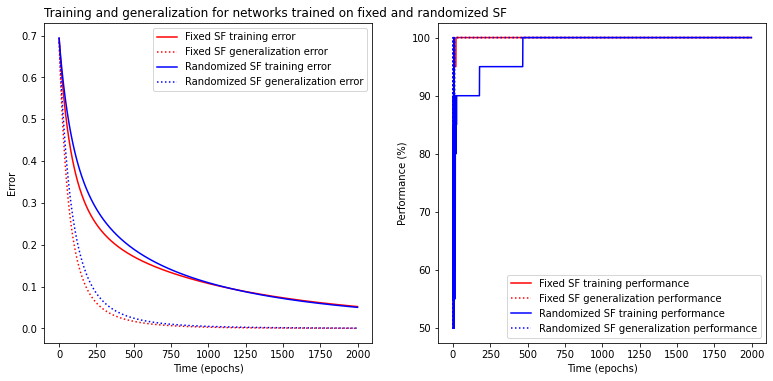

In [38]:
plt.figure(figsize = [20, 20])
plt.subplot(3, 3, 1)
fixed_net.plot_training_error('red')
fixed_net.plot_generalization_error('red')
random_net.plot_training_error('blue')
random_net.plot_generalization_error('blue')
plt.legend(["Fixed SF training error", "Fixed SF generalization error", "Randomized SF training error",
           "Randomized SF generalization error"]);
plt.title("Training and generalization for networks trained on fixed and randomized SF", loc = "left")

plt.subplot(3, 3, 2)
fixed_net.plot_training_performance('red')
fixed_net.plot_generalization_performance('red')
random_net.plot_training_performance('blue')
random_net.plot_generalization_performance('blue')
plt.legend(["Fixed SF training performance", "Fixed SF generalization performance", 
            "Randomized SF training performance", "Randomized SF generalization performance"]);

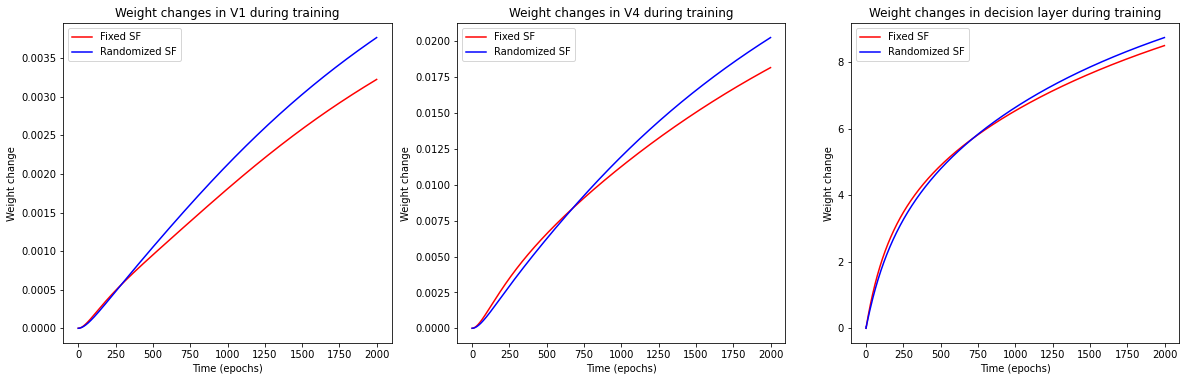

In [39]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)

fixed_net.plot_weight_change('red', v1 = True)
random_net.plot_weight_change('blue', v1 = True)
plt.legend(["Fixed SF", "Randomized SF"]);

plt.subplot(3, 3, 2)
fixed_net.plot_weight_change('red', v4 = True)
random_net.plot_weight_change('blue', v4 = True)
plt.legend(["Fixed SF", "Randomized SF"]);

plt.subplot(3, 3, 3)
fixed_net.plot_weight_change('red', decision = True)
random_net.plot_weight_change('blue', decision = True)
plt.legend(["Fixed SF", "Randomized SF"]);

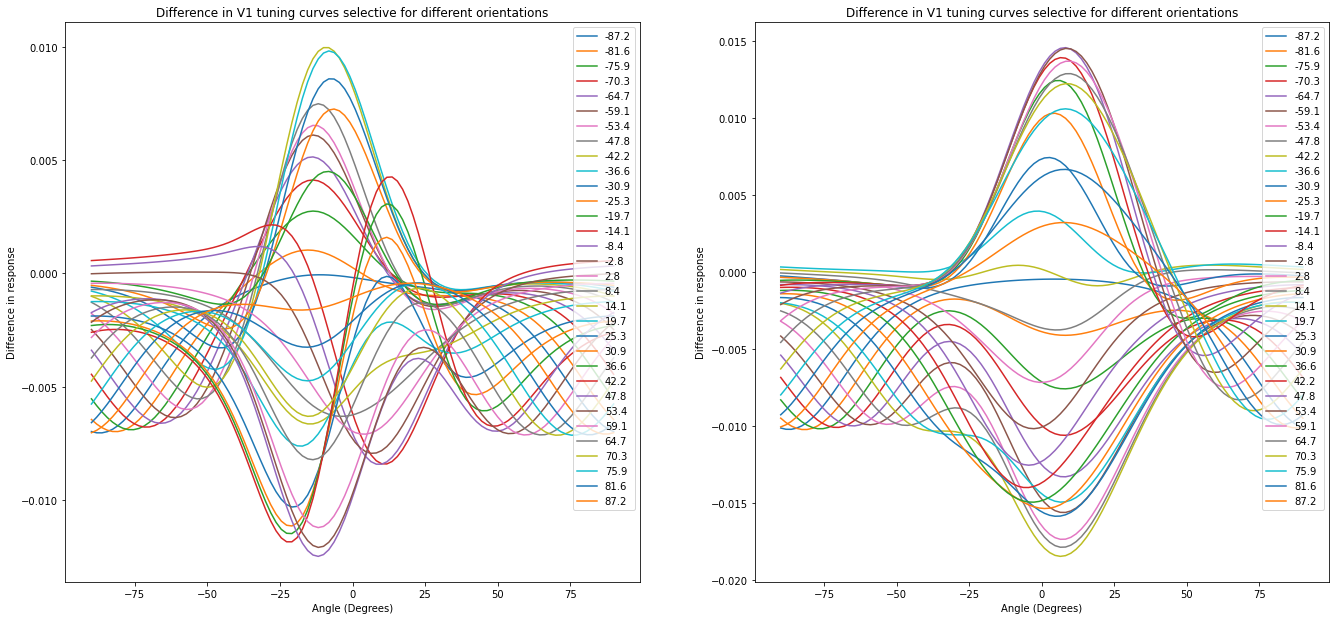

In [14]:
plt.figure(figsize = [35, 35])
difference = True
plt.subplot(3, 3, 1)
fixed_net.plot_v1_tuning_curve(orientation = 4, phi_sf = 0, position = 12, orientations = True, differences = difference)

plt.subplot(3, 3, 2)
random_net.plot_v1_tuning_curve(orientation = 4, phi_sf = 0, position = 12, orientations = True, differences = difference)

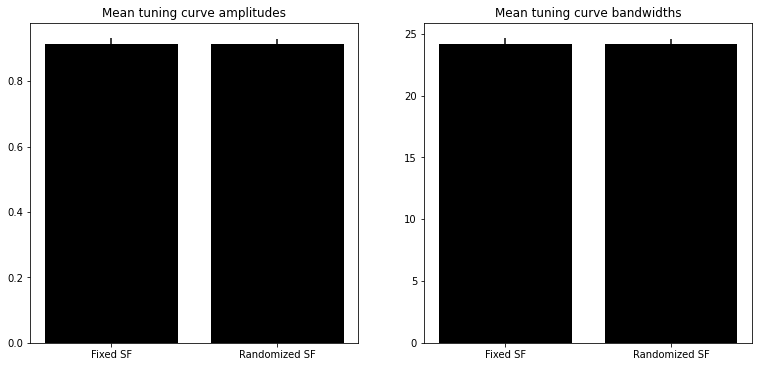

In [15]:
fixed_net.v1_tuning_params(12)
random_net.v1_tuning_params(12)

plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)
plt.bar(["Fixed SF", "Randomized SF"], [fixed_net.v1_mean_after_amplitude, random_net.v1_mean_after_amplitude], yerr = [
    fixed_net.v1_std_after_amplitude, random_net.v1_std_after_amplitude], color = "black");
plt.title("Mean tuning curve amplitudes");

plt.subplot(3, 3, 2)
plt.bar(["Fixed SF", "Randomized SF"], [fixed_net.v1_mean_after_bandwidth, random_net.v1_mean_after_bandwidth], yerr = [
    fixed_net.v1_std_after_bandwidth, random_net.v1_std_after_bandwidth], color = "black");
plt.title("Mean tuning curve bandwidths");

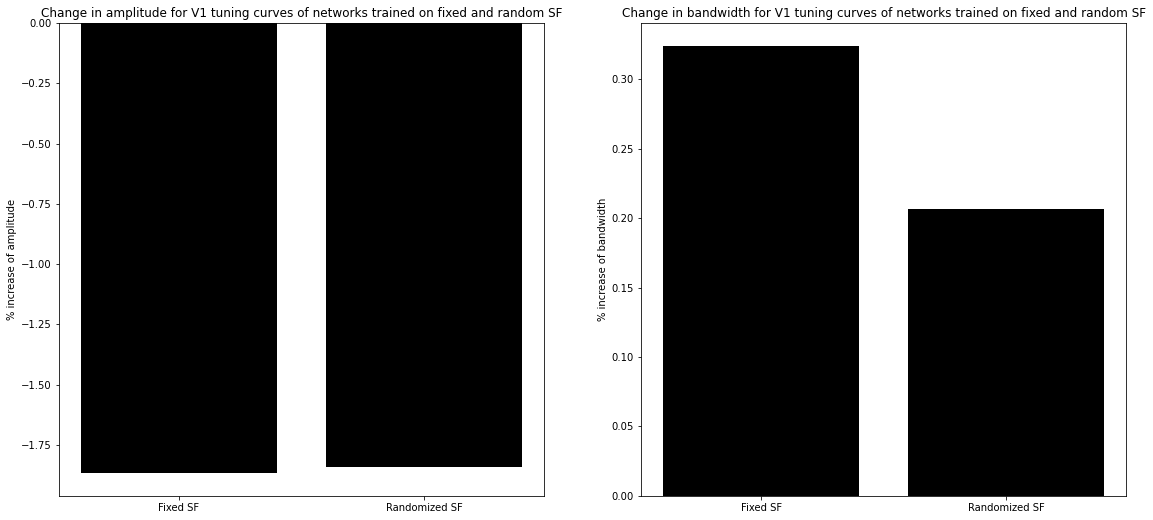

In [16]:
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
plt.bar(["Fixed SF", "Randomized SF"], [fixed_net.v1_amplitude_difference, random_net.v1_amplitude_difference], color = "black");
plt.ylabel("% increase of amplitude");
plt.title("Change in amplitude for V1 tuning curves of networks trained on fixed and random SF");

plt.subplot(4, 4, 2)
plt.bar(["Fixed SF", "Randomized SF"], [fixed_net.v1_bandwidth_difference, random_net.v1_bandwidth_difference], color = "black");
plt.ylabel("% increase of bandwidth");
plt.title("Change in bandwidth for V1 tuning curves of networks trained on fixed and random SF");

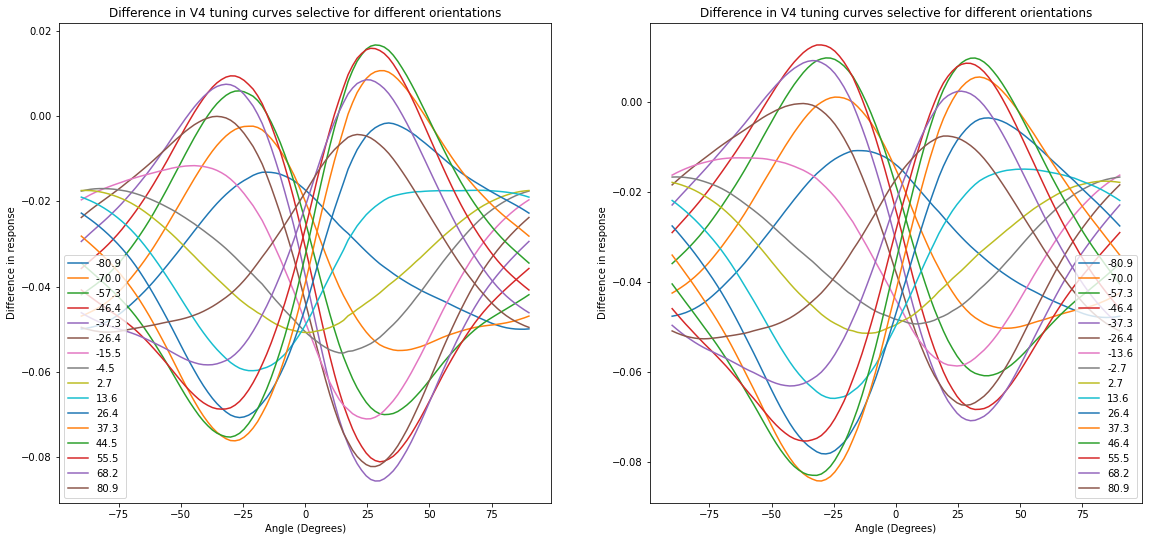

In [18]:
plt.figure(figsize = [30, 30])
difference = True
plt.subplot(3, 3, 1)
fixed_net.plot_v4_tuning_curve(position = 1, differences = difference)

plt.subplot(3, 3, 2)
random_net.plot_v4_tuning_curve(position = 1, differences = difference)

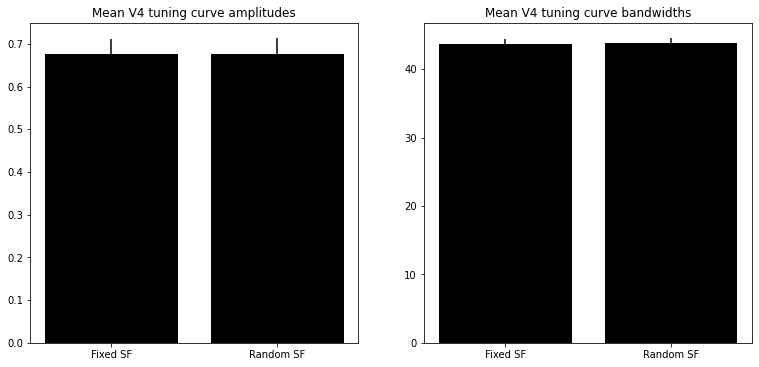

In [19]:
fixed_net.v4_tuning_params(1)
random_net.v4_tuning_params(1)

plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)
plt.bar(["Fixed SF", "Random SF"], [
    fixed_net.v4_mean_after_amplitude, random_net.v4_mean_after_amplitude], yerr = [
    fixed_net.v4_std_after_amplitude, random_net.v4_std_after_amplitude], color = "black");
plt.title("Mean V4 tuning curve amplitudes");

plt.subplot(3, 3, 2)
plt.bar(["Fixed SF", "Random SF"], [
    fixed_net.v4_mean_after_bandwidth, random_net.v4_mean_after_bandwidth], yerr = [
    fixed_net.v4_std_after_bandwidth, random_net.v4_std_after_bandwidth], color = "black");
plt.title("Mean V4 tuning curve bandwidths");

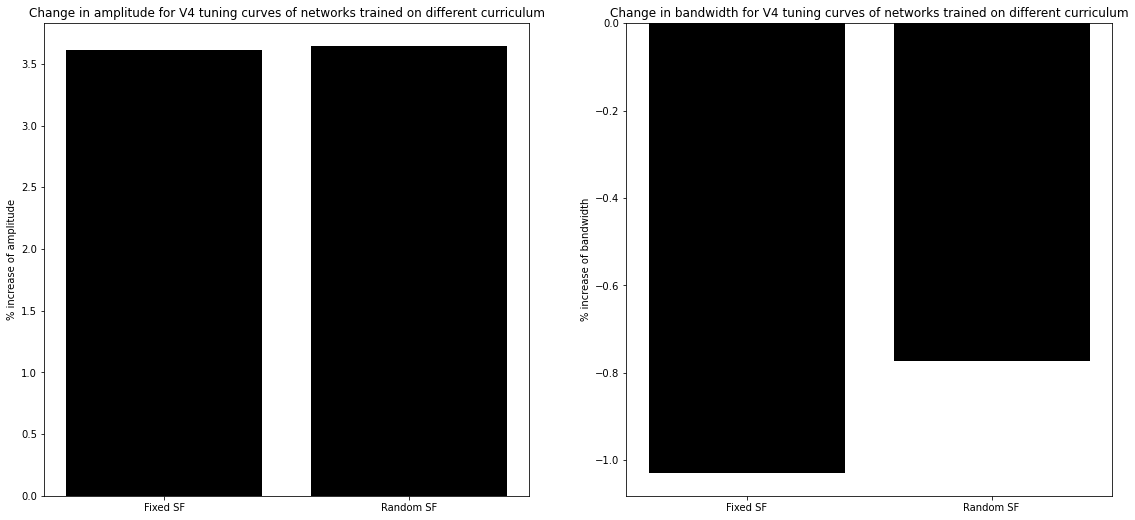

In [36]:
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
plt.bar(["Fixed SF", "Random SF"], [
    fixed_net.v4_amplitude_difference, random_net.v4_amplitude_difference], color = "black");
plt.ylabel("% increase of amplitude");
plt.title("Change in amplitude for V4 tuning curves of networks trained on different curriculum");

plt.subplot(4, 4, 2)
plt.bar(["Fixed SF", "Random SF"], [
    fixed_net.v4_bandwidth_difference, random_net.v4_bandwidth_difference], color = "black");
plt.ylabel("% increase of bandwidth");
plt.title("Change in bandwidth for V4 tuning curves of networks trained on different curriculum");

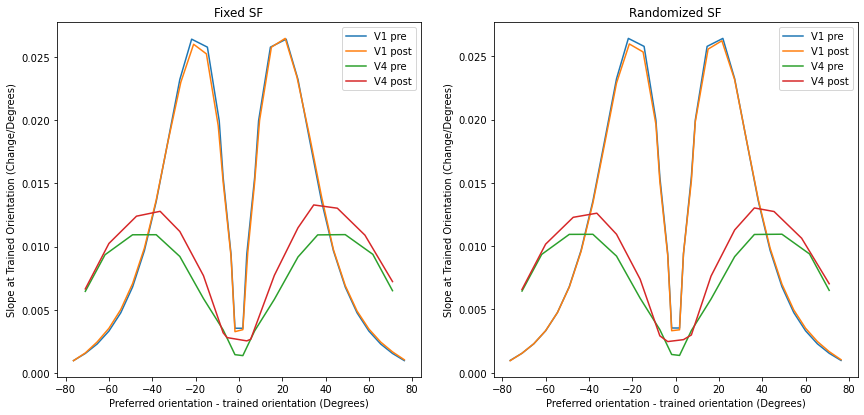

In [40]:
plt.figure(figsize = [30, 30])

plt.subplot(4, 4, 1)
fixed_net.otc_curve(v1_position = 11, v4_position = 1)
fixed_net.plot_otc_curve()
plt.title("Fixed SF");

plt.subplot(4, 4, 2)
random_net.otc_curve(v1_position = 11, v4_position = 1)
random_net.plot_otc_curve()
plt.title("Randomized SF");

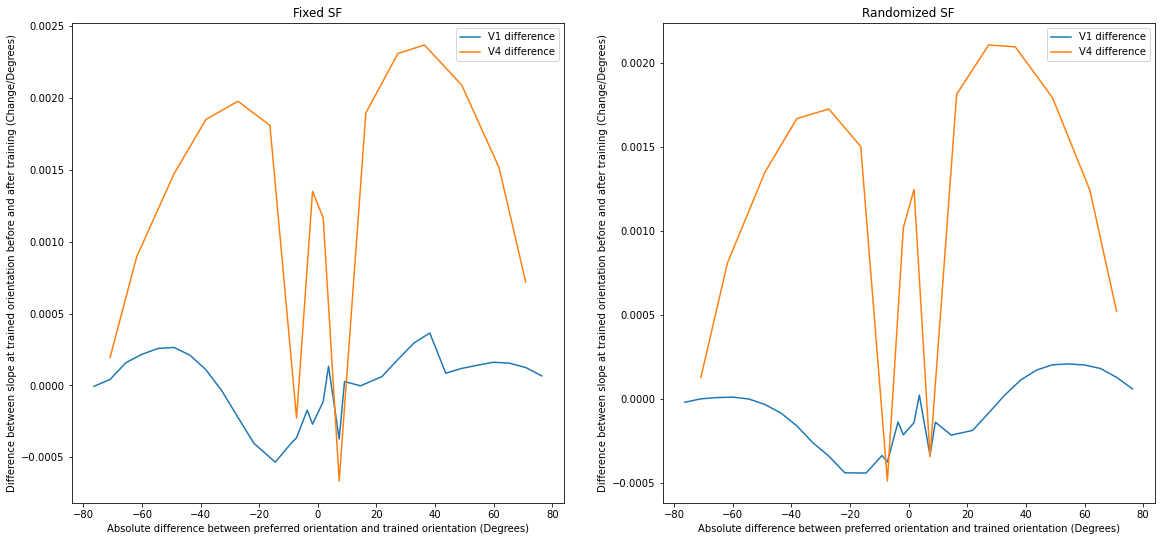

In [22]:
plt.figure(figsize = [30, 30])
plt.subplot(3, 3, 1)
fixed_net.plot_otc_curve_diff(absolute_diff = False)
plt.title("Fixed SF");

plt.subplot(3, 3, 2)
random_net.plot_otc_curve_diff(absolute_diff = False)
plt.title("Randomized SF");

100%|██████████| 23/23 [00:55<00:00,  2.39s/it]


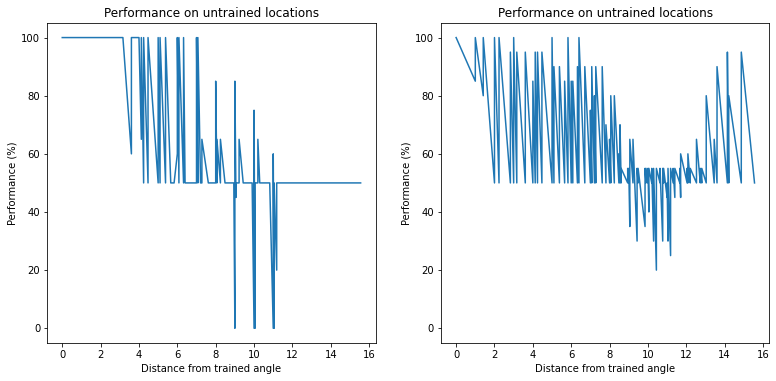

In [26]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)
np.random.seed(0)
torch.manual_seed(0)
fixed_net.plot_transfer_score(performance = True, grid = False)

plt.subplot(3, 3, 2)
np.random.seed(0)
torch.manual_seed(0)
random_net.plot_transfer_score(performance = True, grid = False)

100%|██████████| 23/23 [00:55<00:00,  2.40s/it]


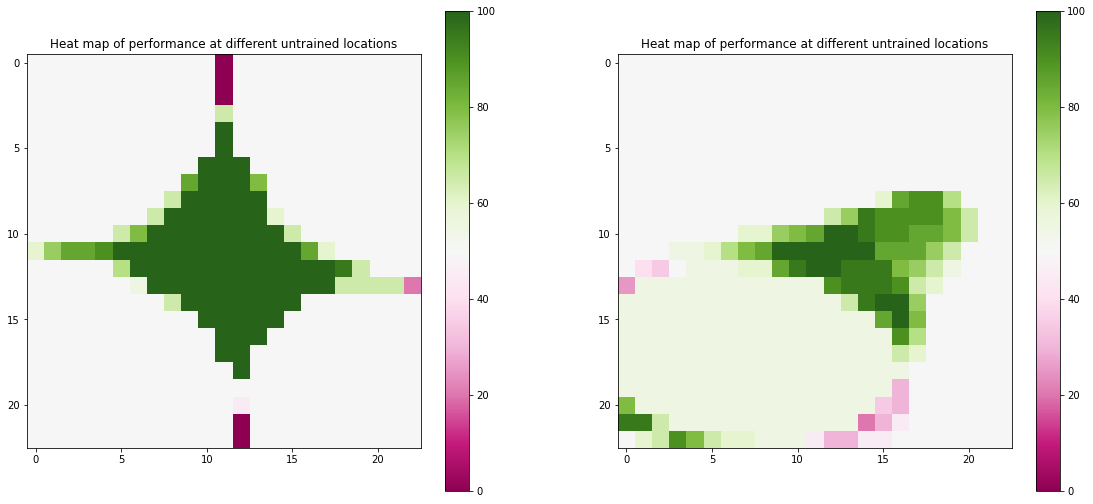

In [24]:
plt.figure(figsize = [30, 30])

plt.subplot(3, 3, 1)
np.random.seed(0)
torch.manual_seed(0)
fixed_net.plot_transfer_score(performance = True, grid = True)

plt.subplot(3, 3, 2)
np.random.seed(0)
torch.manual_seed(0)
random_net.plot_transfer_score(performance = True, grid = True)

## Precision test

In [31]:
np.random.seed(0)
torch.manual_seed(0)

net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
net.transfer_inputting(-np.pi/18, np.pi/18, 11, 11, random_sf = False)
net.desired_outputting()
optimizer = optim.SGD(net.parameters(), lr = net.alpha)
net.train(5000, optimizer)

np.random.seed(0)
torch.manual_seed(0)

net2 = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
net2.transfer_inputting(-np.pi/360, np.pi/360, 11, 11, random_sf = False)
net2.desired_outputting()
optimizer = optim.SGD(net2.parameters(), lr = net2.alpha)
net2.train(5000, optimizer)

100%|██████████| 100/100 [05:09<00:00,  3.10s/it]


In [32]:
np.random.seed(0)
torch.manual_seed(0)
net3 = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
optimizer = optim.SGD(net3.parameters(), lr = net3.alpha)
net3.double_train(2500, optimizer, np.pi/18, np.pi/360, 11, 11)

100%|██████████| 100/100 [05:10<00:00,  3.10s/it]


In [41]:
torch.save(net.state_dict(), "Low_precision_transfer_model.pt")
torch.save(net.losses, "Low_precision_transfer_model_loss.pt")
torch.save(net.training_scores, "Low_precision_transfer_model_performance.pt")
torch.save(net.v1_weight_changes, "Low_precision_transfer_model_v1_weight_change.pt")
torch.save(net.v4_weight_changes, "Low_precision_transfer_model_v4_weight_change.pt")
torch.save(net.decision_weight_changes, "Low_precision_transfer_model_decision_weight_change.pt")
torch.save(net.angle1, "Low_precision_transfer_model_angle1.pt")
torch.save(net.angle2, "Low_precision_transfer_model_angle2.pt")
torch.save(net.train_x_location, "Low_precision_transfer_model_x_location.pt")
torch.save(net.train_y_location, "Low_precision_transfer_model_y_location.pt")
torch.save(net.generalize_perform, "Low_precision_transfer_model_generalization_performance.pt")
torch.save(net.generalize_error, "Low_precision_transfer_model_generalization_error.pt")
torch.save(net.trained_phis, "Low_precision_transfer_model_phases.pt")
torch.save(net.trained_sfs, "Low_precision_transfer_model_sfs.pt")
torch.save(net.v1_angles, "Low_precision_transfer_model_v1_angles.pt")

torch.save(net2.state_dict(), "High_precision_transfer_model.pt")
torch.save(net2.losses, "High_precision_transfer_model_loss.pt")
torch.save(net2.training_scores, "High_precision_transfer_model_performance.pt")
torch.save(net2.v1_weight_changes, "High_precision_transfer_model_v1_weight_change.pt")
torch.save(net2.v4_weight_changes, "High_precision_transfer_model_v4_weight_change.pt")
torch.save(net2.decision_weight_changes, "High_precision_transfer_model_decision_weight_change.pt")
torch.save(net2.angle1, "High_precision_transfer_model_angle1.pt")
torch.save(net2.angle2, "High_precision_transfer_model_angle2.pt")
torch.save(net2.train_x_location, "High_precision_transfer_model_x_location.pt")
torch.save(net2.train_y_location, "High_precision_transfer_model_y_location.pt")
torch.save(net2.generalize_perform, "High_precision_transfer_model_generalization_performance.pt")
torch.save(net2.generalize_error, "High_precision_transfer_model_generalization_error.pt")
torch.save(net2.trained_phis, "High_precision_transfer_model_phases.pt")
torch.save(net2.trained_sfs, "High_precision_transfer_model_sfs.pt")
torch.save(net2.v1_angles, "High_precision_transfer_model_v1_angles.pt")

torch.save(net3.state_dict(), "Sequential_transfer_model.pt")
torch.save(net3.losses, "Sequential_transfer_model_loss.pt")
torch.save(net3.training_scores, "Sequential_transfer_model_performance.pt")
torch.save(net3.generalize_error, "Sequential_transfer_model_generalization_loss.pt")
torch.save(net3.generalize_perform, "Sequential_transfer_model_generalization_perform.pt")
torch.save(net3.v1_weight_changes, "Sequential_transfer_model_v1_weight_change.pt")
torch.save(net3.v4_weight_changes, "Sequential_transfer_model_v4_weight_change.pt")
torch.save(net3.decision_weight_changes, "Sequential_transfer_model_decision_weight_change.pt")
torch.save(net3.angle1, "Sequential_transfer_model_angle1.pt")
torch.save(net3.angle2, "Sequential_transfer_model_angle2.pt")
torch.save(net3.train_x_location, "Sequential_transfer_model_x_location.pt")
torch.save(net3.train_y_location, "Sequential_transfer_model_y_location.pt")
torch.save(net3.generalize_perform, "Sequential_transfer_model_generalization_performance.pt")
torch.save(net3.generalize_error, "Sequential_transfer_model_generalization_error.pt")
torch.save(net3.trained_phis, "Sequential_transfer_model_phases.pt")
torch.save(net3.trained_sfs, "Sequential_transfer_model_sfs.pt")
torch.save(net3.v1_angles, "Sequential_transfer_model_v1_angles.pt")

In [13]:
np.random.seed(0)
torch.manual_seed(0)

net = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
net.load_state_dict(torch.load("Low_precision_model.pt"))
net.losses = torch.load("Low_precision_model_loss.pt")
net.training_scores = torch.load("Low_precision_model_performance.pt")
net.v1_weight_changes = torch.load("Low_precision_model_v1_weight_change.pt")
net.v4_weight_changes = torch.load("Low_precision_model_v4_weight_change.pt")
net.decision_weight_changes = torch.load("Low_precision_model_decision_weight_change.pt")
net.angle1 = torch.load("Low_precision_model_angle1.pt")
net.angle2 = torch.load("Low_precision_model_angle2.pt")
net.train_x_location = torch.load("Low_precision_model_x_location.pt")
net.train_y_location = torch.load("Low_precision_model_y_location.pt")
net.generalize_perform = torch.load("Low_precision_model_generalization_performance.pt")
net.generalize_error = torch.load("Low_precision_model_generalization_error.pt")
net.v1_tuning_curve()
net.v4_tuning_curve()

np.random.seed(0)
torch.manual_seed(0)

net2 = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
net2.load_state_dict(torch.load("High_precision_model.pt"))
net2.losses = torch.load("High_precision_model_loss.pt")
net2.training_scores = torch.load("High_precision_model_performance.pt")
net2.v1_weight_changes = torch.load("High_precision_model_v1_weight_change.pt")
net2.v4_weight_changes = torch.load("High_precision_model_v4_weight_change.pt")
net2.decision_weight_changes = torch.load("High_precision_model_decision_weight_change.pt")
net2.angle1 = torch.load("High_precision_model_angle1.pt")
net2.angle2 = torch.load("High_precision_model_angle2.pt")
net2.train_x_location = torch.load("High_precision_model_x_location.pt")
net2.train_y_location = torch.load("High_precision_model_y_location.pt")
net2.generalize_perform = torch.load("High_precision_model_generalization_performance.pt")
net2.generalize_error = torch.load("High_precision_model_generalization_error.pt")
net2.v1_tuning_curve()
net2.v4_tuning_curve()

np.random.seed(0)
torch.manual_seed(0)

net3 = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
optimizer = optim.SGD(net3.parameters(), lr = net3.alpha)
net3.load_state_dict(torch.load("Sequential_model.pt"))
net3.losses = torch.load("Sequential_model_loss.pt")
net3.training_scores = torch.load("Sequential_model_performance.pt")
net3.generalize_error = torch.load("Sequential_model_generalization_loss.pt")
net3.generalize_perform = torch.load("Sequential_model_generalization_perform.pt")
net3.v1_weight_changes = torch.load("Sequential_model_v1_weight_change.pt")
net3.v4_weight_changes = torch.load("Sequential_model_v4_weight_change.pt")
net3.decision_weight_changes = torch.load("Sequential_model_decision_weight_change.pt")
net3.angle1 = torch.load("Sequential_model_angle1.pt")
net3.angle2 = torch.load("Sequential_model_angle2.pt")
net3.train_x_location = torch.load("Sequential_model_x_location.pt")
net3.train_y_location = torch.load("Sequential_model_y_location.pt")
net3.generalize_perform = torch.load("Sequential_model_generalization_performance.pt")
net3.generalize_error = torch.load("Sequential_model_generalization_error.pt")
net3.v1_tuning_curve()
net3.v4_tuning_curve()

100%|██████████| 100/100 [05:00<00:00,  3.00s/it]


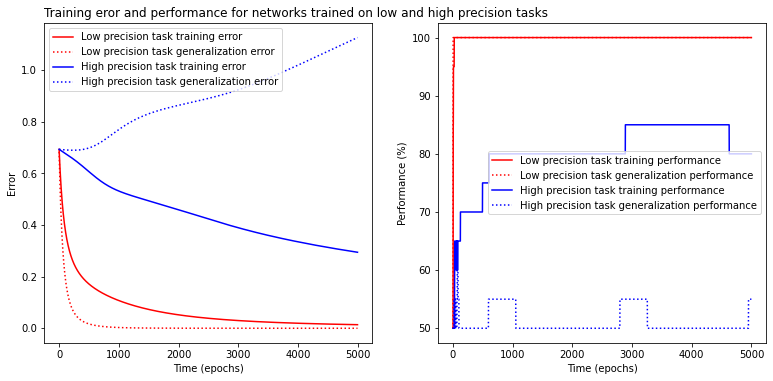

In [42]:
plt.figure(figsize = [20, 20])
plt.subplot(3, 3, 1)
net.plot_training_error('red')
net.plot_generalization_error('red')
net2.plot_training_error('blue')
net2.plot_generalization_error('blue')
plt.legend(["Low precision task training error", "Low precision task generalization error",
            "High precision task training error", "High precision task generalization error"]);
plt.title("Training eror and performance for networks trained on low and high precision tasks", loc = "left")

plt.subplot(3, 3, 2)
net.plot_training_performance('red')
net.plot_generalization_performance('red')
net2.plot_training_performance('blue')
net2.plot_generalization_performance('blue')
plt.legend(["Low precision task training performance", "Low precision task generalization performance",
            "High precision task training performance", "High precision task generalization performance"]);


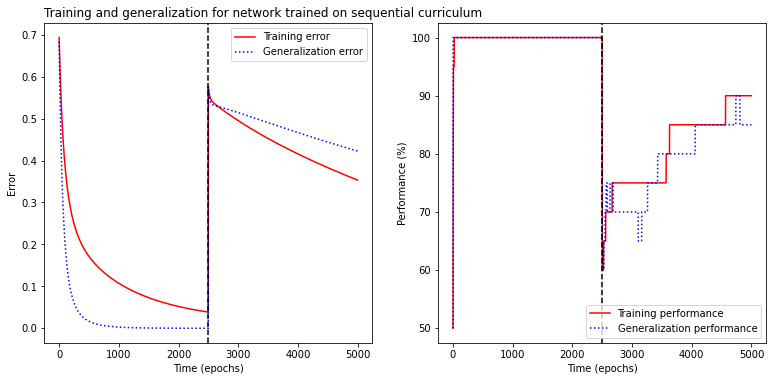

In [43]:
plt.figure(figsize = [20, 20])
plt.subplot(3, 3, 1)
net3.plot_training_error('red')
net3.plot_generalization_error('blue')
plt.axvline(2500, 0, 1, linestyle = 'dashed', color = 'black');
plt.legend(["Training error", "Generalization error"]);
plt.title("Training and generalization for network trained on sequential curriculum", loc = "left")

plt.subplot(3, 3, 2)
net3.plot_training_performance('red')
net3.plot_generalization_performance('blue')
plt.legend(["Training performance", "Generalization performance"]);
plt.axvline(2500, 0, 1, linestyle = 'dashed', color = 'black');


100%|██████████| 180/180 [00:19<00:00,  9.46it/s]


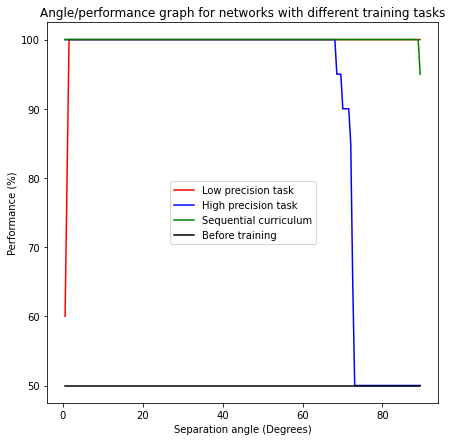

In [81]:
plt.figure(figsize = [7, 7])

np.random.seed(0)
torch.manual_seed(0)
net4 = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, v4_orientation_number = 16, 
    phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.13)
np.random.seed(0)
torch.manual_seed(0)
net.plot_angle_performance(angle_number = 180, color = 'red')

np.random.seed(0)
torch.manual_seed(0)
net2.plot_angle_performance(angle_number = 180, color = 'blue')

np.random.seed(0)
torch.manual_seed(0)
net3.plot_angle_performance(angle_number = 180, color ='green')

np.random.seed(0)
torch.manual_seed(0)
net4.plot_angle_performance(angle_number = 180, color = 'black')

plt.title("Angle/performance graph for networks with different training tasks");
plt.legend(["Low precision task", "High precision task", "Sequential curriculum", "Before training"]);

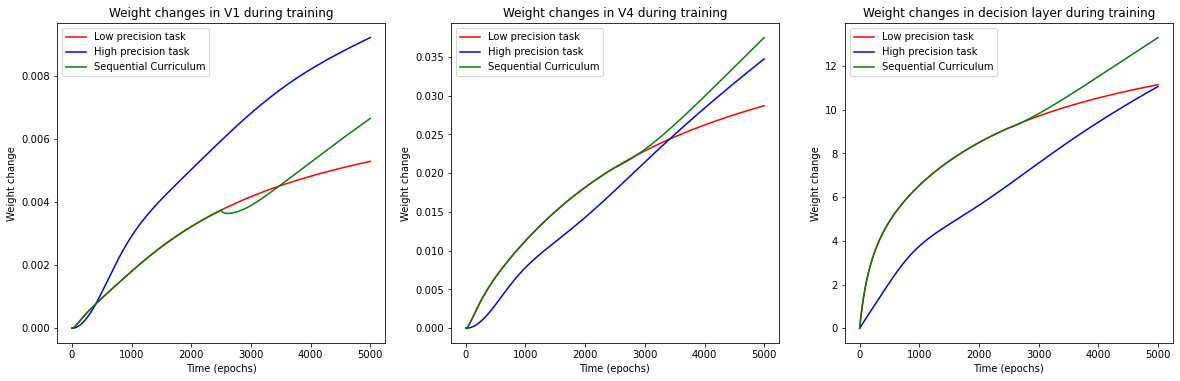

In [46]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)

net.plot_weight_change('red', v1 = True)
net2.plot_weight_change('blue', v1 = True)
net3.plot_weight_change('green', v1 = True)
plt.legend(["Low precision task", "High precision task", "Sequential Curriculum"]);

plt.subplot(3, 3, 2)
net.plot_weight_change('red', v4 = True)
net2.plot_weight_change('blue', v4 = True)
net3.plot_weight_change('green', v4 = True)
plt.legend(["Low precision task", "High precision task", "Sequential Curriculum"]);

plt.subplot(3, 3, 3)
net.plot_weight_change('red', decision = True)
net2.plot_weight_change('blue', decision = True)
net3.plot_weight_change('green', decision = True)
plt.legend(["Low precision task", "High precision task", "Sequential Curriculum"]);

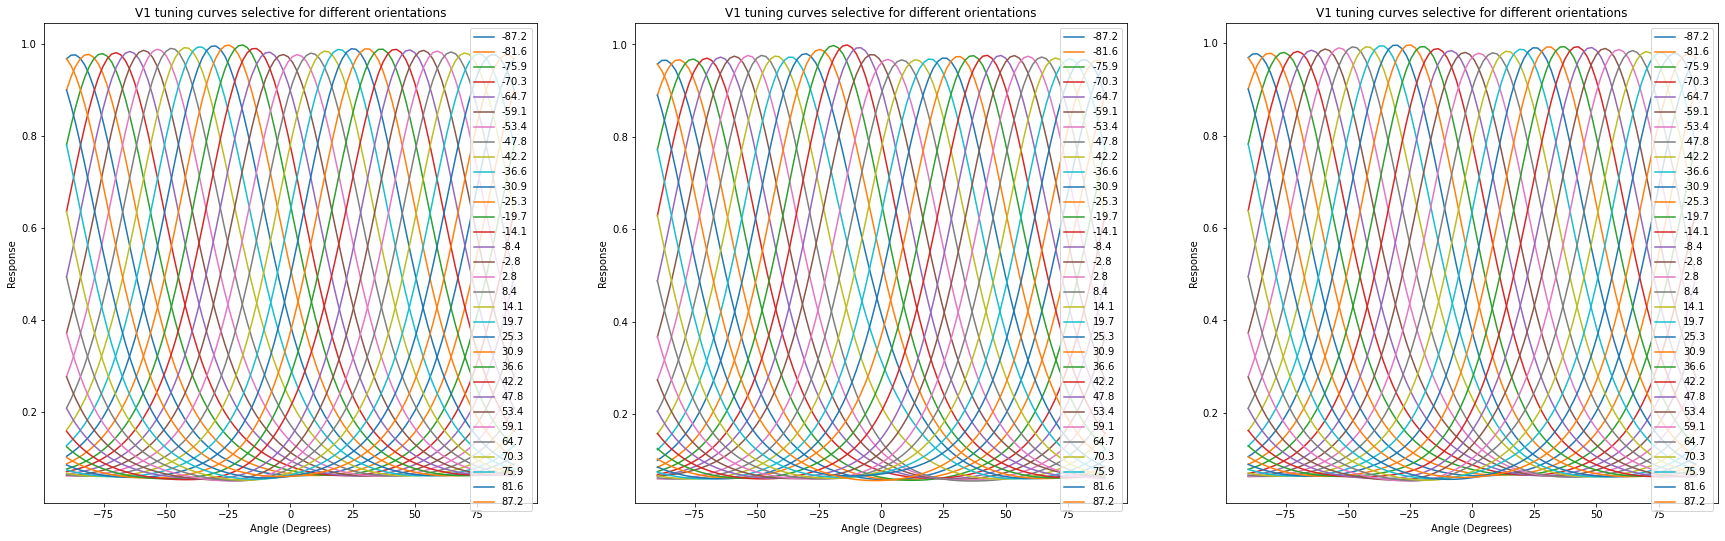

In [62]:
plt.figure(figsize = [30, 30])
difference = False
plt.subplot(3, 3, 1)
net.plot_v1_tuning_curve(orientation = 3, phi_sf = 0, position = 12, orientations = True, differences = difference)

plt.subplot(3, 3, 2)
net2.plot_v1_tuning_curve(orientation = 3, phi_sf = 0, position = 12, orientations = True, differences = difference)

plt.subplot(3, 3, 3)
net3.plot_v1_tuning_curve(orientation = 3, phi_sf = 0, position = 12, orientations = True, differences = difference)

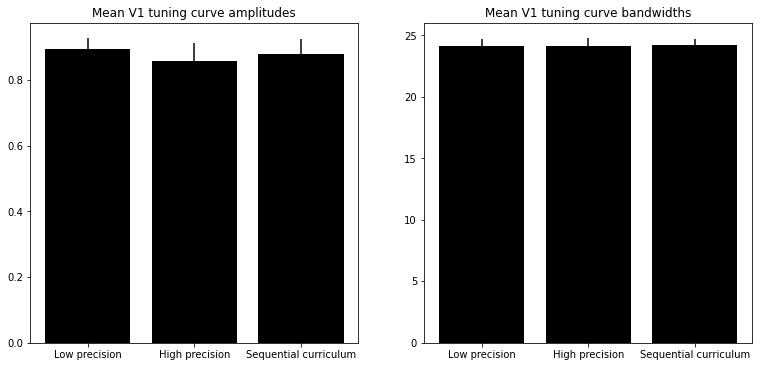

In [48]:
net.v1_tuning_params(12)
net2.v1_tuning_params(12)
net3.v1_tuning_params(12)

plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v1_mean_after_amplitude, net2.v1_mean_after_amplitude, net3.v1_mean_after_amplitude], yerr = [
    net.v1_std_after_amplitude, net2.v1_std_after_amplitude, net3.v1_std_after_amplitude], color = "black");
plt.title("Mean V1 tuning curve amplitudes");

plt.subplot(3, 3, 2)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v1_mean_after_bandwidth, net2.v1_mean_after_bandwidth, net3.v1_mean_after_bandwidth], yerr = [
    net.v1_std_after_bandwidth, net2.v1_std_after_bandwidth, net3.v1_std_after_bandwidth], color = "black");
plt.title("Mean V1 tuning curve bandwidths");

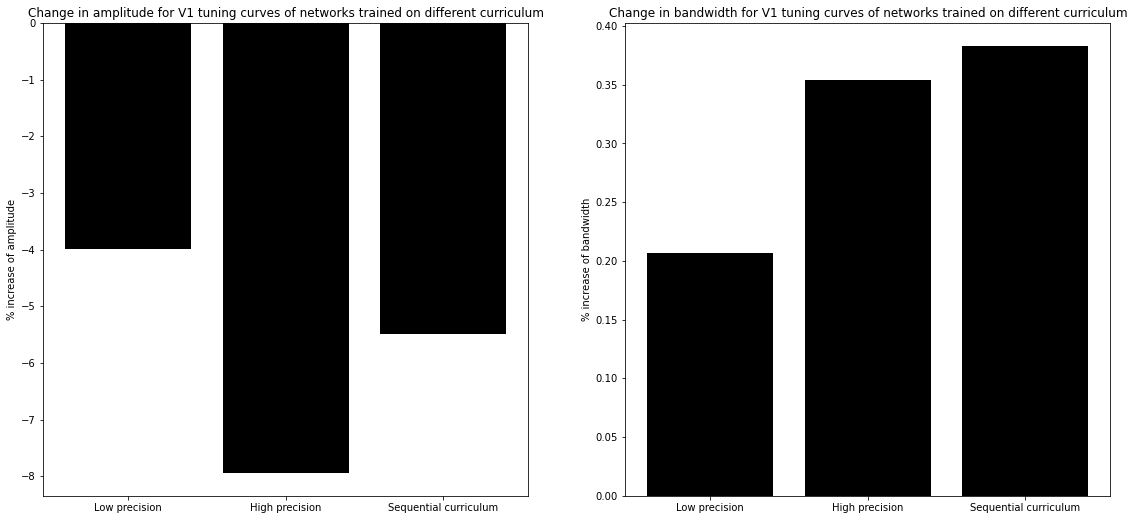

In [49]:
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v1_amplitude_difference, net2.v1_amplitude_difference, net3.v1_amplitude_difference], color = "black");
plt.ylabel("% increase of amplitude");
plt.title("Change in amplitude for V1 tuning curves of networks trained on different curriculum");

plt.subplot(4, 4, 2)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v1_bandwidth_difference, net2.v1_bandwidth_difference, net3.v1_bandwidth_difference], color = "black");
plt.ylabel("% increase of bandwidth");
plt.title("Change in bandwidth for V1 tuning curves of networks trained on different curriculum");

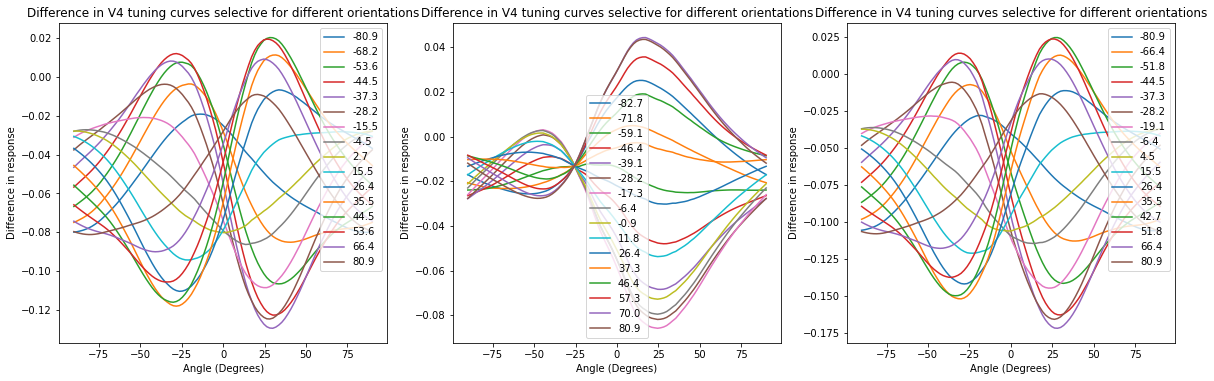

In [64]:
plt.figure(figsize = [20, 20])
difference = True
plt.subplot(3, 3, 1)
net.plot_v4_tuning_curve(position = 1, differences = difference)

plt.subplot(3, 3, 2)
net2.plot_v4_tuning_curve(position = 1, differences = difference)

plt.subplot(3, 3, 3)
net3.plot_v4_tuning_curve(position = 1, differences = difference)

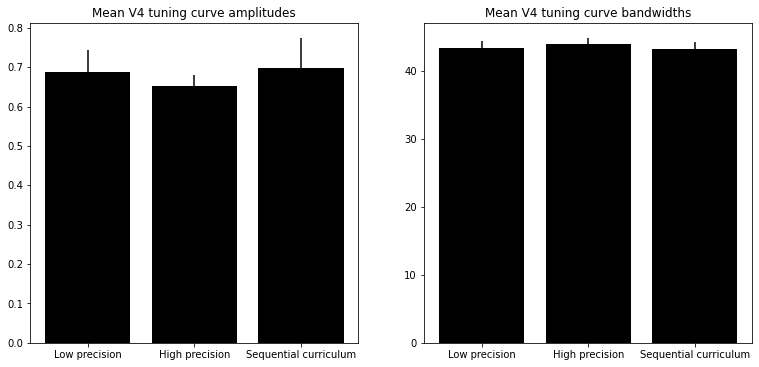

In [51]:
net.v4_tuning_params(1)
net2.v4_tuning_params(1)
net3.v4_tuning_params(1)

plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v4_mean_after_amplitude, net2.v4_mean_after_amplitude, net3.v4_mean_after_amplitude], yerr = [
    net.v4_std_after_amplitude, net2.v4_std_after_amplitude, net3.v4_std_after_amplitude], color = "black");
plt.title("Mean V4 tuning curve amplitudes");

plt.subplot(3, 3, 2)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v4_mean_after_bandwidth, net2.v4_mean_after_bandwidth, net3.v4_mean_after_bandwidth], yerr = [
    net.v4_std_after_bandwidth, net2.v4_std_after_bandwidth, net3.v4_std_after_bandwidth], color = "black");
plt.title("Mean V4 tuning curve bandwidths");

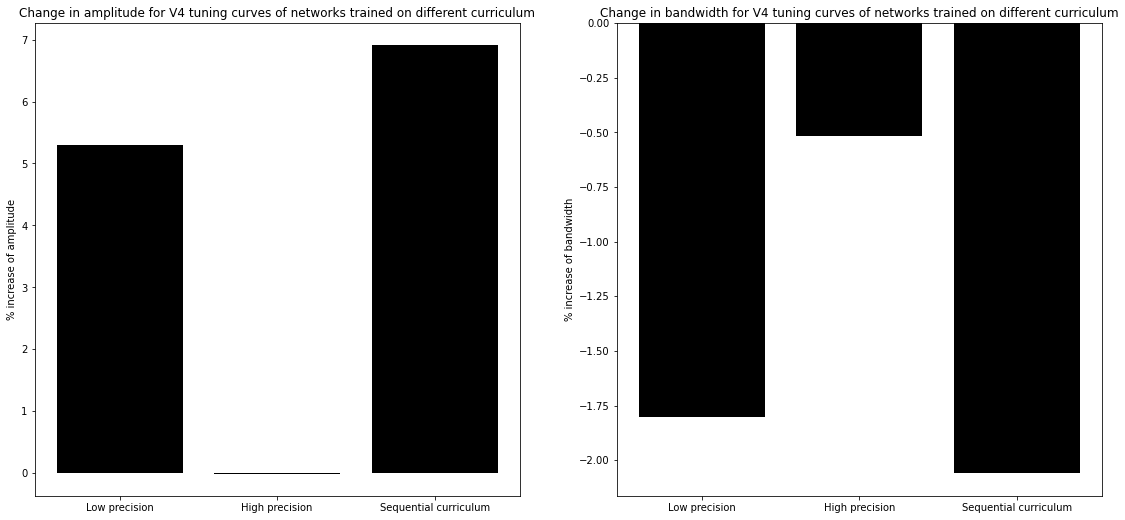

In [52]:
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v4_amplitude_difference, net2.v4_amplitude_difference, net3.v4_amplitude_difference], color = "black");
plt.ylabel("% increase of amplitude");
plt.title("Change in amplitude for V4 tuning curves of networks trained on different curriculum");

plt.subplot(4, 4, 2)
plt.bar(["Low precision", "High precision", "Sequential curriculum"], [
    net.v4_bandwidth_difference, net2.v4_bandwidth_difference, net3.v4_bandwidth_difference], color = "black");
plt.ylabel("% increase of bandwidth");
plt.title("Change in bandwidth for V4 tuning curves of networks trained on different curriculum");

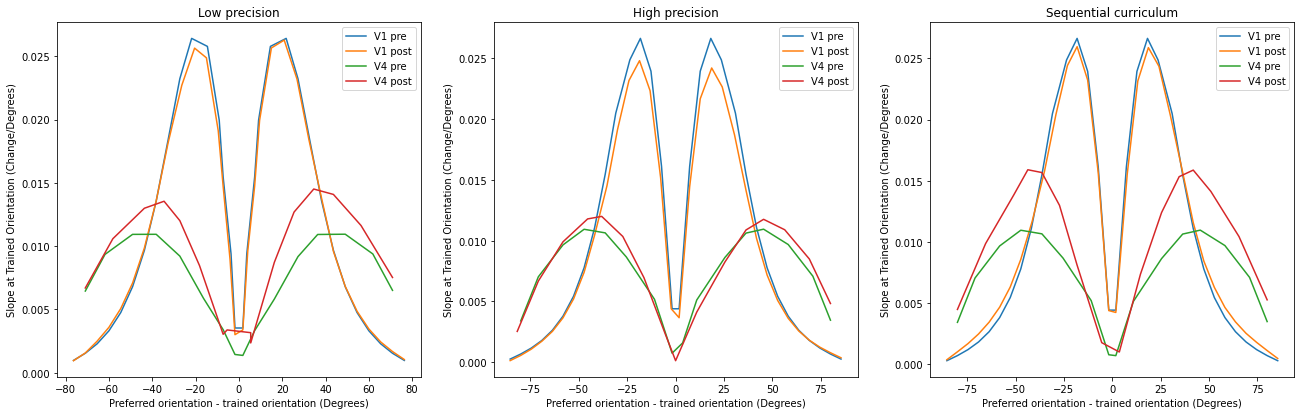

In [53]:
plt.figure(figsize = [30, 30])

plt.subplot(4, 4, 1)
net.otc_curve(v1_position = 11, v4_position = 1)
net.plot_otc_curve()
plt.title("Low precision");

plt.subplot(4, 4, 2)
net2.otc_curve(v1_position = 11, v4_position = 1)
net2.plot_otc_curve()
plt.title("High precision");

plt.subplot(4, 4, 3)
net3.otc_curve(v1_position = 11, v4_position = 1)
net3.plot_otc_curve()
plt.title("Sequential curriculum");


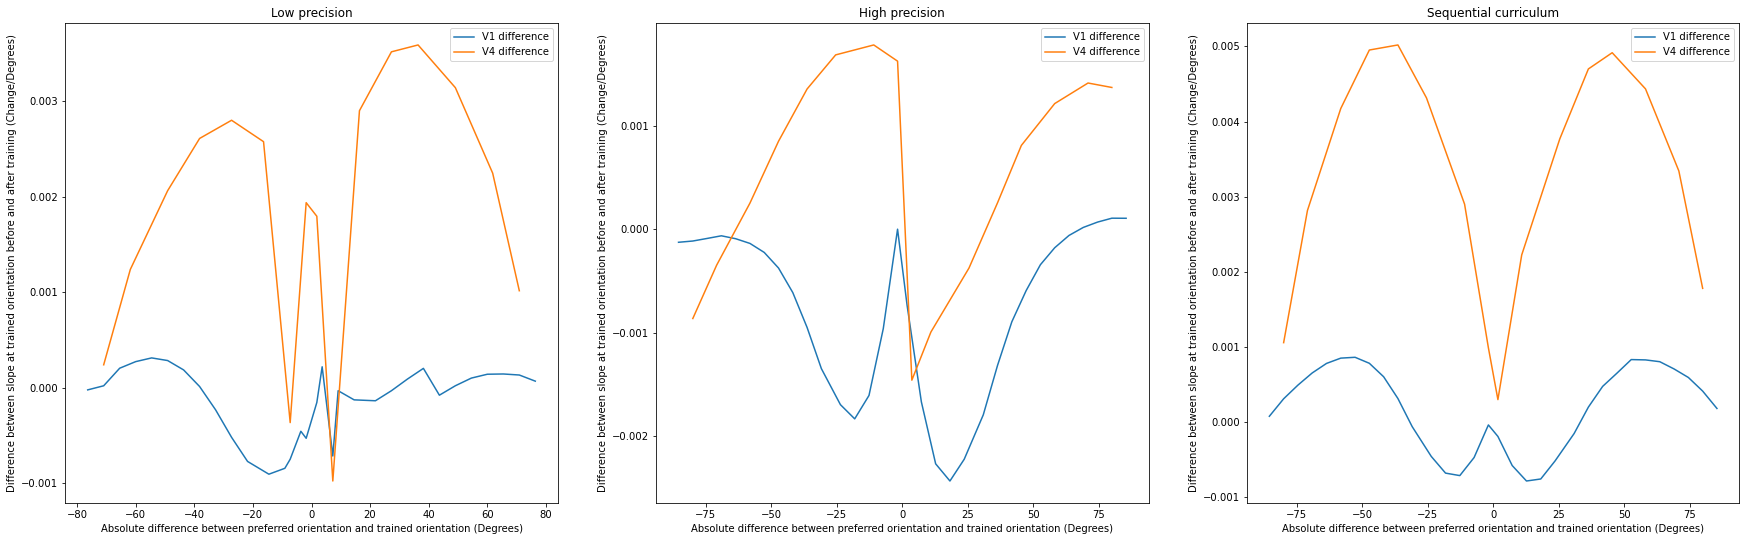

In [54]:
plt.figure(figsize = [30, 30])
plt.subplot(3, 3, 1)
net.plot_otc_curve_diff()
plt.title("Low precision");

plt.subplot(3, 3, 2)
net2.plot_otc_curve_diff()
plt.title("High precision");

plt.subplot(3, 3, 3)
net3.plot_otc_curve_diff()
plt.title("Sequential curriculum");

100%|██████████| 23/23 [00:55<00:00,  2.42s/it]


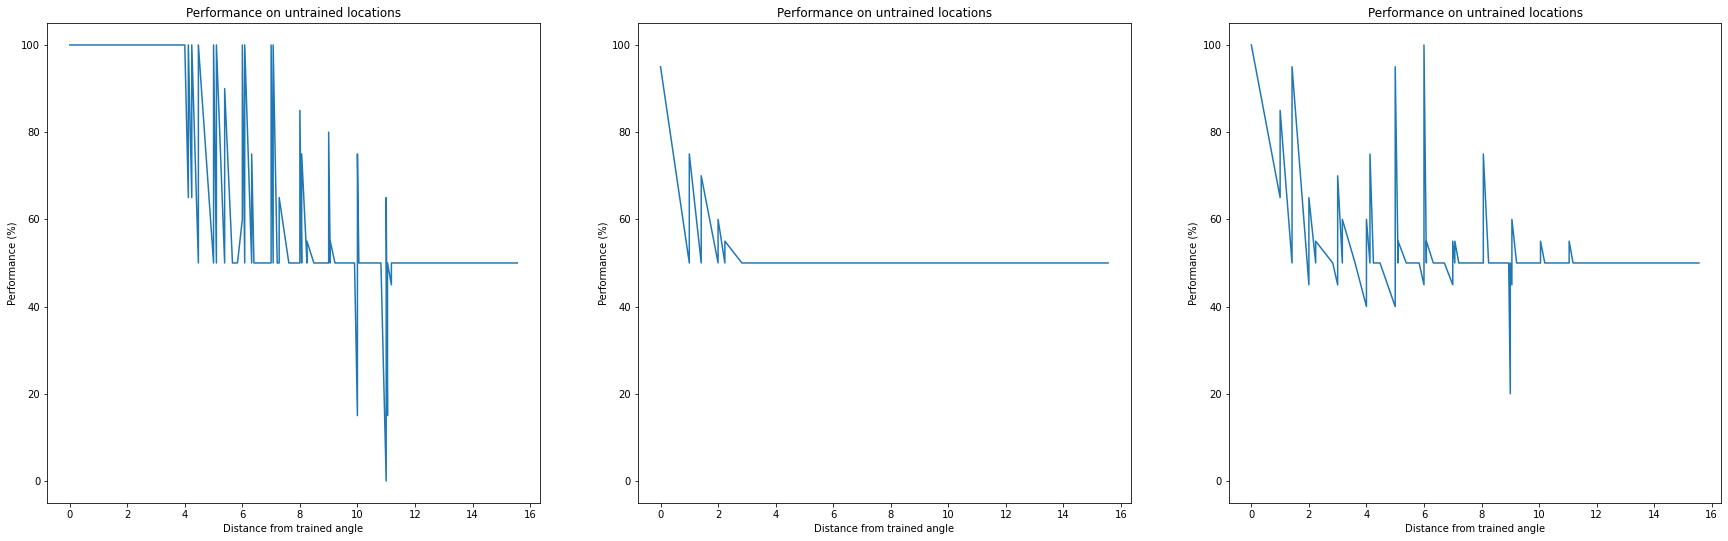

In [67]:
plt.figure(figsize = [30, 30])
plt.subplot(3, 3, 1)
np.random.seed(0)
torch.manual_seed(0)
net.plot_transfer_score(performance = True, grid = False)

plt.subplot(3, 3, 2)
np.random.seed(0)
torch.manual_seed(0)
net2.plot_transfer_score(performance = True, grid = False)

plt.subplot(3, 3, 3)
np.random.seed(0)
torch.manual_seed(0)
net3.plot_transfer_score(performance = True, grid = False)

100%|██████████| 23/23 [00:55<00:00,  2.43s/it]


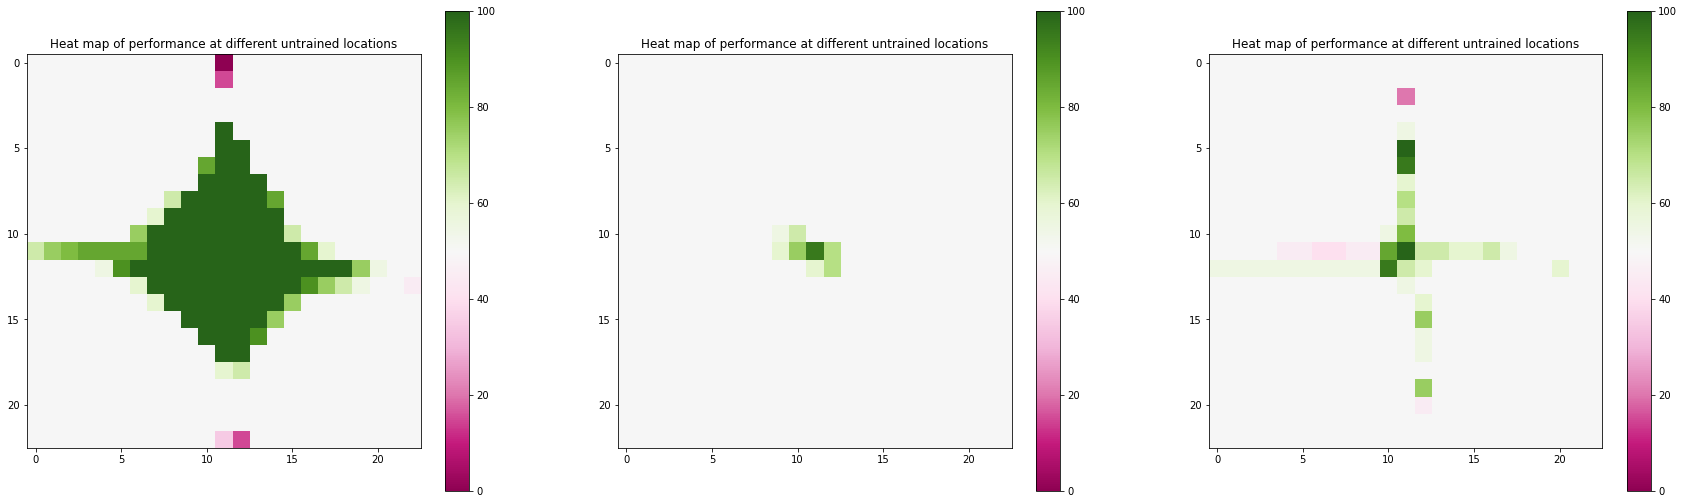

In [71]:
plt.figure(figsize = [30, 30])

plt.subplot(3, 3, 1)
np.random.seed(0)
torch.manual_seed(0)
net.plot_transfer_score(performance = True, grid = True)

plt.subplot(3, 3, 2)
np.random.seed(0)
torch.manual_seed(0)
net2.plot_transfer_score(performance = True, grid = True)

plt.subplot(3, 3, 3)
np.random.seed(0)
torch.manual_seed(0)
net3.plot_transfer_score(performance = True, grid = True)

## Random

In [ ]:
curve = fixed_net.results[1, 0, 12, 12, :]
initial_params = fixed_net.initial_tuning_curves[1, 0, 12, 12, :]
plt.plot(curve)
plt.plot(initial_params)

x = np.linspace(0, np.pi, 100)
x = (x * 180) / np.pi

def find_nearest(tensor, value):
        idx = (torch.abs(tensor - value)).argmin()
        return idx.item()

    
halfmax_amplitude = torch.abs(curve.max()) - torch.abs(curve.min())
halfmax = halfmax_amplitude/2
halfmax_index1 = find_nearest(curve, halfmax)
temporary = torch.cat([curve[0:halfmax_index1], curve[halfmax_index1+1:]])
halfmax_index2 = find_nearest(temporary, halfmax)
add = 0
while halfmax_index1-2 <= halfmax_index2 <= halfmax_index1+2:
                    temporary = torch.cat([temporary[0:halfmax_index2], temporary[halfmax_index2+1:]])
                    halfmax_index2 = find_nearest(temporary, halfmax)
                    add += 1

if halfmax_index1 < halfmax_index2:
    halfmax_index2 += 1
try1 = np.abs(x[halfmax_index1] - x[halfmax_index2])
try2 = 180 - np.abs(x[halfmax_index1] - x[halfmax_index2])
if try1 < try2:
    bandwidth = try1
else:
    bandwidth = try2



halfmax2_amplitude2 = torch.abs(initial_params.max()) - torch.abs(initial_params.min())
halfmax2 = halfmax2_amplitude2/2
halfmax2_index1 = find_nearest(initial_params, halfmax2)
temporary2 = torch.cat([initial_params[0:halfmax2_index1], initial_params[halfmax2_index1+1:]])
halfmax2_index2 = find_nearest(temporary2, halfmax2)
add = 0
while halfmax2_index1-2 <= halfmax2_index2 <= halfmax2_index1+2:
                    temporary = torch.cat([temporary[0:halfmax2_index2], temporary[halfmax2_index2+1:]])
                    halfmax2_index2 = find_nearest(temporary, halfmax2)
                    add += 1
if halfmax2_index1 < halfmax2_index2:
    halfmax2_index2 += 1
try1 = np.abs(x[halfmax2_index1] - x[halfmax2_index2])
try2 = 180 - np.abs(x[halfmax2_index1] - x[halfmax2_index2])
if try1 < try2:
    bandwidth2 = try1
else:
    bandwidth2 = try2

bandwidth, bandwidth2
halfmax, halfmax_index1, halfmax_index2, halfmax2_index1


In [ ]:
print(fixed_net.before_bandwidths == fixed_net.after_bandwidths)

In [ ]:
print(fixed_net.initial_tuning_curves[0][0][12][12][:]) 
print(random_net.initial_tuning_curves[0][0][12][12][:])

In [ ]:
for i in fixed_net.parameters():
    print(i)

In [ ]:
input = torch.rand(1, 1, 5, 5)
weight = torch.randn(1, 4, 1, 4, 4, 2**2)
input

In [ ]:
weight.shape

In [ ]:
output = input.unfold(2, 2, 2).unfold(3, 2, 2)
output2 = output.contiguous().view(*output.size()[:-2],-1)
output2

In [ ]:
out = (output2.unsqueeze(1) * weight).sum([2,-1])
a = []
for i in range(0, 4, 2):
    a.append(torch.sum(out[0][i:i+2] ** 2, dim = 0))
out, torch.stack(a).view(2, 4, 4)

In [ ]:
weight.sum([2,-1])

In [ ]:
def generate_gabor(size, theta):
    ksize = size
    sigma = 3
    lamda = 5
    gamma = 0.5
    phi = 0
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi)
    return torch.tensor(kernel).view(1, 1, size, size).float()

angles = np.linspace(0, np.pi, 6)
weights = []
for i in range(6):
    for j in range(49):
        theta = angles[i]
        kernel = generate_gabor(5, theta)
        weights.append(kernel)
weight = torch.stack(weights).view(1, 6, 1, 7, 7, 25)
weights

In [ ]:

inputs = []

x = np.linspace(0, np.pi, 10)

for i in range(1):
    theta = x[i]
    kernel = generate_gabor(11, theta)
    inputs.append(kernel)

input = torch.stack(inputs).view(1, 1, 11, 11)
output = input.unfold(2, 5, 1).unfold(3, 5, 1)
output2 = output.contiguous().view(*output.size()[:-2],-1)
out = (output2.unsqueeze(1) * weight).sum([2,-1])
output2.shape

In [ ]:
x = np.linspace(0, 7, 6)
np.delete(x, -1)
x

In [ ]:
np.linspace(0, np.pi, 3), np.pi/2

In [ ]:
m = nn.MaxPool2d((2,2), stride = (2,2))
input = torch.rand(1, 1, 5, 5)
input, m(input)

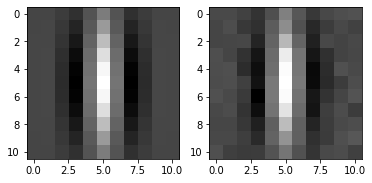

In [3]:
fig, [ax1, ax2] = plt.subplots(1, 2)
ksize = 11
sigma = 1.6
lamda = 5
gamma = 0.5
phi = 0
theta = 0
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi)
kernel = torch.tensor(kernel)
ax1.imshow(kernel, 'gray')

ksize = 11
sigma = 1.5
lamda = 5
gamma = 0.5
phi = 0
theta = 0
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi)
kernel = torch.tensor(kernel)
noise = torch.normal(0, 0.03, (11, 11))
kernel = kernel+ noise
ax2.imshow(kernel, 'gray')

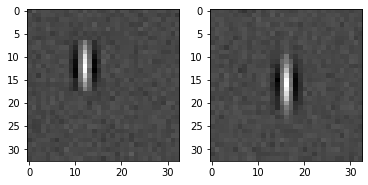

In [48]:
fig, [ax1, ax2] = plt.subplots(1, 2)
ksize = 11
sigma = 1.6
lamda = 5
gamma = 0.5
phi = 0
theta = 0
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi)
kernel = torch.tensor(kernel)
noise = torch.normal(0, 0.03, (33,33))
y_location = 7
x_location = 7

if not 0 <= x_location <= 22 or not 0 <= y_location <= 22:
    print("x_location and y_location needs to be between 0 and " + str(22))
for i in range(ksize):
    for j in range(ksize):
        noise[i + y_location][j + x_location] = kernel[i][j] + noise[i + y_location][j + x_location]
ax1.imshow(noise, 'gray')

ksize = 33
sigma = 1.6
lamda = 5
gamma = 0.5
phi = 0
theta = 0
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi)
kernel = torch.tensor(kernel)
noise = torch.normal(0, 0.03, (33,33))
y_location = 0
x_location = 0

if not 0 <= x_location <= 22 or not 0 <= y_location <= 22:
    print("x_location and y_location needs to be between 0 and " + str(22))
for i in range(ksize):
    for j in range(ksize):
        noise[i + y_location][j + x_location] = kernel[i][j] + noise[i + y_location][j + x_location]
ax2.imshow(noise, 'gray')

In [55]:
def gaussian(M, std):
    n = torch.arange(0, M) - (M - 1.0) / 2.0
    sig2 = 2 * std * std
    w = torch.exp(-n ** 2 / sig2)
    return w

def gkern(kernlen=256, std=128):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = gaussian(kernlen, std=std).reshape(kernlen)
    gkern2d = torch.outer(gkern1d, gkern1d)
    return gkern2d

def gkern_1d(kernlen=256, std=128):
    """Returns a 1D Gaussian kernel array."""
    gkern1d = gaussian(kernlen, std=std).reshape(kernlen)
    return gkern1d

# # Test plot
# plt.figure()
# plt.imshow(gkern(11, std=2), 'gray')
# plt.show()
a = (gkern(11, 2),)*5
b = torch.stack(a)
scale = gkern_1d(5, 2)
scales = torch.empty(5, 11, 11)
for i in range(5):
    scales[i] = b[i] * scale[i]
scales.shape

torch.Size([5, 11, 11])

In [56]:
# input number: 1, input size: 3x3, weight size: 2x2, weight number 2
x = torch.rand(1, 3, 3)
weight = torch.rand(1, 2, 2, 4)
y = x.unfold(1, 2, 1).unfold(2, 2, 1)
z = y.contiguous().view(*y.size()[:-2], -1)
out = (z.unsqueeze(1)*weight).sum([1, -1])
out.shape

torch.Size([1, 2, 2])

In [ ]:

def random():
    
    x = np.random.rand(1)
    y = torch.rand(1)
    return x, y


In [ ]:
np.random.seed(0)
torch.manual_seed(0)
random()

In [ ]:
device = torch.device('cuda')
device

In [ ]:
torch.manual_seed(0)
x = torch.rand(11)
halfmax = x.max()/2

def find_nearest(tensor, value):
    idx = (torch.abs(tensor - value)).argmin()
    return idx
a = find_nearest(x, halfmax)
temporary = torch.cat([x[0:a], x[a+1:]])
x[a], x[find_nearest(temporary, halfmax)]

In [ ]:
torch.cuda.is_available()

In [ ]:
device = torch.device("cuda:0")
device

In [ ]:
torch.cuda.device_count()

In [ ]:
print(torch.cuda.get_device_name(torch.cuda.current_device()))

In [ ]:
a = np.random.rand(5)
b = range(5)
plt.plot(a)
plt.errorbar(b, a, xerr = a.std(), yerr = a.std())
a.mean()

In [ ]:
a = torch.tensor([-1.2, -2, -3, -4, 0.2, 0.3])
(torch.abs(a.max())-torch.abs(a.min()))/2

In [ ]:
torch.manual_seed(0)
x = torch.empty((6, 3, 3, 100))
for i in range(100):
    y = torch.rand((6, 3, 3))
    x[:, :, :, i] = y
x

In [ ]:
F.relu(torch.tensor(-2))

In [ ]:
x = [1, 2, 3, 4]
y = torch.tensor(x)
y

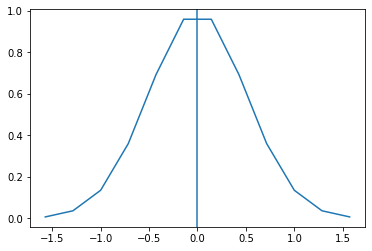

In [46]:
M = 12
mean = 0
std = 0.5
n = torch.linspace(-np.pi/2, np.pi/2, M) - mean
sig2 = 2 * std * std
w = torch.exp(-n ** 2 / sig2)
plt.plot(np.linspace(-np.pi/2, np.pi/2, M), w);
plt.axvline(0)

In [23]:
v4_weight = torch.rand(12, 3, 3, 12, 121)
pools = torch.rand(12, 23, 23)
out = pools.unfold(1, 11, 6).unfold(2, 11, 6)
out = out.contiguous().view(*out.size()[:-2], -1)
# out = (out.unsqueeze(1)*v4_weight).sum([1, -1])
out.shape

torch.Size([12, 3, 3, 121])

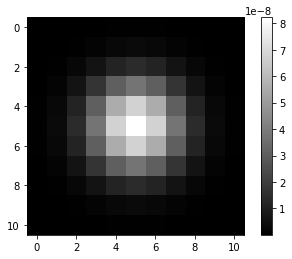

In [45]:
plt.imshow(schoups_net.generate_3d_gaussian(-np.pi/2, 0.5)[10], 'gray')
plt.colorbar()

In [67]:
a = torch.rand(3, 2, 2)
a, a.sum(1), a.sum([1, -1])
c = a.sum([1, -1]).sum(0)
d = a.sum([1, -1, 0])
c==d

tensor(True)

In [76]:
a = torch.rand(5, 1, 3, 3, 6)
b = torch.rand(5, 3, 3, 6)
a, b, (a*b)

(tensor([[[[[0.1206, 0.1730, 0.1067, 0.3099, 0.2835, 0.7641],
            [0.1191, 0.5831, 0.0121, 0.0385, 0.8917, 0.0929],
            [0.8891, 0.1876, 0.2011, 0.3396, 0.8272, 0.7525]],
 
           [[0.3720, 0.2546, 0.1567, 0.4739, 0.4136, 0.1782],
            [0.3074, 0.5037, 0.6242, 0.1007, 0.3446, 0.5486],
            [0.7189, 0.4050, 0.6605, 0.3974, 0.9037, 0.5927]],
 
           [[0.8303, 0.4727, 0.7806, 0.1067, 0.4121, 0.8867],
            [0.8961, 0.6261, 0.3349, 0.2441, 0.6209, 0.3306],
            [0.2619, 0.3712, 0.8269, 0.8975, 0.4457, 0.9060]]]],
 
 
 
         [[[[0.8815, 0.0934, 0.4066, 0.4608, 0.8875, 0.1020],
            [0.2339, 0.2426, 0.5514, 0.0736, 0.6340, 0.2395],
            [0.3268, 0.2621, 0.0305, 0.3861, 0.6307, 0.9711]],
 
           [[0.8817, 0.3731, 0.9159, 0.1443, 0.4958, 0.0305],
            [0.7569, 0.8030, 0.9021, 0.2351, 0.4226, 0.8776],
            [0.4875, 0.4022, 0.2659, 0.0255, 0.8092, 0.3308]],
 
           [[0.6482, 0.9709, 0.1122, 0.0594, 0.31

In [55]:
a = torch.rand(2, 1, 2)
b = torch.rand(2, 2)
a, b, (a*b)

(tensor([[[0.3146, 0.5812]],
 
         [[0.7717, 0.5912]]]),
 tensor([[0.2407, 0.3305],
         [0.5656, 0.9599]]),
 tensor([[[0.0757, 0.1921],
          [0.1780, 0.5579]],
 
         [[0.1858, 0.1954],
          [0.4365, 0.5675]]]))

In [61]:
torch.tensor([1, 2, 3]) == torch.tensor([1, 2, 3])

tensor([True, True, True])

In [89]:
schoups_net.v4_weight.shape

torch.Size([6, 12, 3, 3, 121])

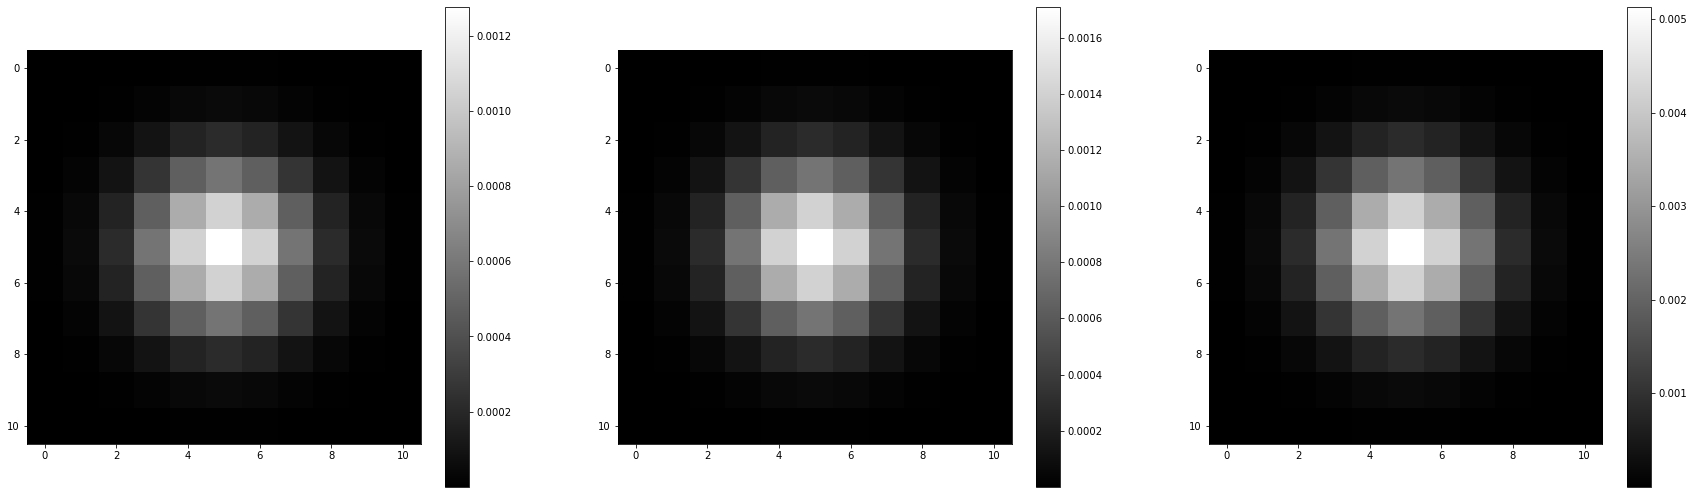

In [11]:
net4 = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.001, rescale = 0.01)


plt.figure(figsize = [30, 30])
plt.subplot(3, 3, 1)
plt.imshow(net4.v4_weight[1][17][1][1].view(11, 11).detach().numpy(), 'gray')
plt.colorbar();

plt.subplot(3, 3, 2)
plt.imshow(net4.v4_weight[1][22][1][1].view(11, 11).detach().numpy(), 'gray')
plt.colorbar();

plt.subplot(3, 3, 3)
plt.imshow(net4.v4_weight[1][27][1][1].view(11, 11).detach().numpy(), 'gray')
plt.colorbar();


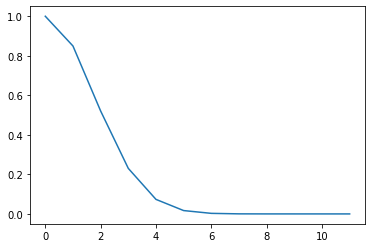

In [142]:
plt.plot(schoups_net.generate_gaussian(-np.pi/2, 0.5, 12))

In [15]:
test_net = LCN_model.LCN(
    input_size = 33, simple_number = 12, simple_size = 11, v4_size = 11, v4_stride = 6, v4_orientation_number = 6, 
    phis_sfs = 4, training_size = 2, phis = True, sfs = False, alpha = 0.01)

TypeError: __init__() got an unexpected keyword argument 'simple_number'

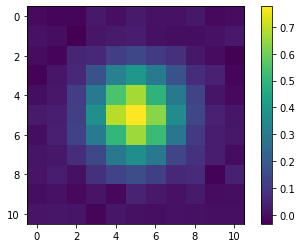

In [141]:

plt.imshow(test_net.v4_weight[0][0][1][1].view(11, 11).detach().numpy())
plt.colorbar();
# test_net.v4_weight[5][0][1][1].view(11, 11)

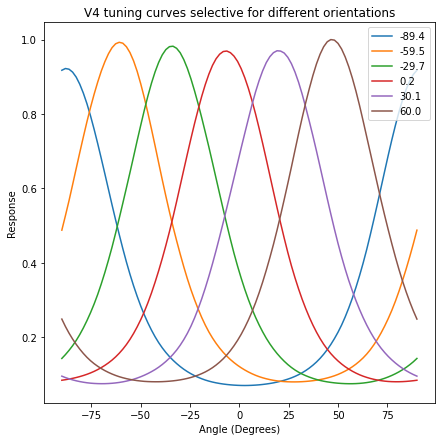

In [141]:
plt.figure(figsize = (7, 7))
    
x = np.linspace(-np.pi/2, np.pi/2, schoups_net.tuning_curve_sample)
x = (x * 180) / np.pi
for i in range(6):
    plt.plot(x, schoups_net.v4_initial_tuning_curves[i][1][1][:]);


# Angles for legend
ranges = schoups_net.remove_ambiguous_stimuli(-np.pi/2, np.pi/2, schoups_net.v4_orientation_number, even_space = True)
ranges = (ranges * 180) / np.pi

plt.legend([round(ranges[i], 1) for i in range(schoups_net.v4_orientation_number)])
plt.ylabel("Response");
plt.title("V4 tuning curves selective for different orientations");
plt.xlabel("Angle (Degrees)");

In [36]:
schoups_net.v4_results[3][1][1]

tensor([0.0100, 0.0104, 0.0110, 0.0116, 0.0121, 0.0126, 0.0130, 0.0135, 0.0140,
        0.0144, 0.0148, 0.0154, 0.0160, 0.0168, 0.0175, 0.0184, 0.0195, 0.0209,
        0.0227, 0.0249, 0.0275, 0.0309, 0.0349, 0.0396, 0.0453, 0.0520, 0.0598,
        0.0687, 0.0790, 0.0906, 0.1036, 0.1180, 0.1339, 0.1511, 0.1695, 0.1888,
        0.2089, 0.2293, 0.2497, 0.2698, 0.2892, 0.3075, 0.3244, 0.3394, 0.3524,
        0.3631, 0.3710, 0.3762, 0.3788, 0.3782, 0.3745, 0.3677, 0.3581, 0.3459,
        0.3316, 0.3150, 0.2967, 0.2773, 0.2569, 0.2359, 0.2146, 0.1937, 0.1733,
        0.1538, 0.1355, 0.1185, 0.1029, 0.0889, 0.0763, 0.0653, 0.0557, 0.0475,
        0.0404, 0.0344, 0.0295, 0.0255, 0.0221, 0.0192, 0.0169, 0.0149, 0.0131,
        0.0117, 0.0106, 0.0097, 0.0090, 0.0084, 0.0080, 0.0078, 0.0076, 0.0076,
        0.0076, 0.0076, 0.0078, 0.0081, 0.0085, 0.0088, 0.0091, 0.0094, 0.0096,
        0.0100])

tensor([0.0000e+00, 1.3587e-36, 2.0079e-22, 8.5109e-12, 1.0346e-04, 3.6074e-01,
        3.6074e-01, 1.0346e-04, 8.5109e-12, 2.0079e-22, 1.3587e-36, 0.0000e+00])

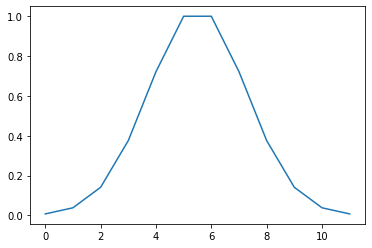

In [15]:
plt.plot(schoups_net.generate_gaussian(0, 0.5, 12) / torch.max(schoups_net.generate_gaussian(0, 0.5, 12)))
schoups_net.generate_gaussian(0, 0.1, 12)

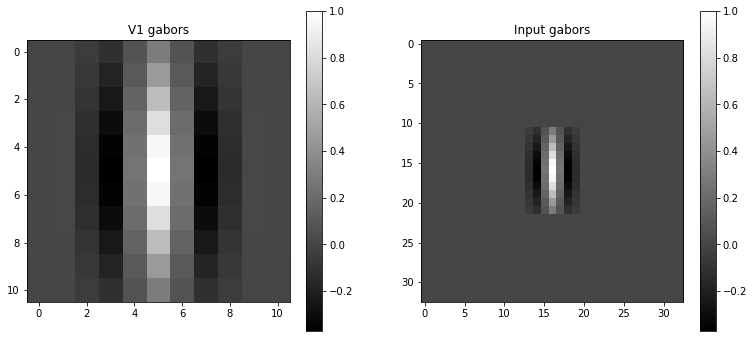

In [5]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)

kernel = schoups_net.generate_gabor(11, 0, 0, 5).view(11, 11)
# noise = torch.normal(0, 0.03, (11, 11))
# kernel = kernel+noise
plt.imshow(kernel, 'gray')
plt.colorbar()
plt.title("V1 gabors");

plt.subplot(3, 3, 2)

kernel = schoups_net.generate_location_gabor(0, 0, 5, 11, 11).view(33, 33)
kernel = kernel
plt.imshow(kernel, 'gray')
plt.colorbar()
plt.title("Input gabors");


In [122]:
a = [-1, 2, -3]
np.abs(a)

array([1, 2, 3])

In [138]:
list1 = schoups_net.v1_after_range
list2 = schoups_net.v1_mean_after_slopes

list1 = np.abs(list1)
zipped_lists = zip(list1, list2)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
list1, list2 = [ list(tuple) for tuple in  tuples]

print(list1, list2)
print(schoups_net.v1_after_range, schoups_net.v1_mean_after_slopes)

[1.3636363636363589, 12.27272727272728, 16.363636363636356, 27.27272727272727, 30.90909090909091, 41.81818181818183, 45.45454545454545, 56.363636363636374, 59.999999999999986, 70.90909090909092, 74.09090909090908, 85.45454545454545] [0.017532044716062956, 0.28416355699300766, 0.298721369355917, 0.22301754355430603, 0.20637335628271103, 0.06608754303306341, 0.049582792446017265, 0.01077596953837201, 0.018909168313257396, 0.0013320893340278417, 0.005083951429696754, 0.005331748980097473]
[-85.45454545454545, -70.90909090909092, -56.363636363636374, -41.81818181818183, -27.27272727272727, -12.27272727272728, 1.3636363636363589, 16.363636363636356, 30.90909090909091, 45.45454545454545, 59.999999999999986, 74.09090909090908] [0.005331748980097473, 0.0013320893340278417, 0.01077596953837201, 0.06608754303306341, 0.22301754355430603, 0.28416355699300766, 0.017532044716062956, 0.298721369355917, 0.20637335628271103, 0.049582792446017265, 0.018909168313257396, 0.005083951429696754]


In [50]:
x = torch.rand(2, 2, 2, 3, 3)
x[:, 1, :, :, :], x[:, 1]

(tensor([[[[0.2214, 0.0888, 0.1898],
           [0.4218, 0.3395, 0.7172],
           [0.0846, 0.7793, 0.1001]],
 
          [[0.9388, 0.2238, 0.1105],
           [0.9174, 0.0680, 0.8473],
           [0.0847, 0.1975, 0.5434]]],
 
 
         [[[0.2696, 0.0720, 0.7654],
           [0.4787, 0.3813, 0.5364],
           [0.5396, 0.2821, 0.8393]],
 
          [[0.3641, 0.3004, 0.0889],
           [0.0920, 0.2244, 0.9755],
           [0.7412, 0.6436, 0.5692]]]]),
 tensor([[[[0.2214, 0.0888, 0.1898],
           [0.4218, 0.3395, 0.7172],
           [0.0846, 0.7793, 0.1001]],
 
          [[0.9388, 0.2238, 0.1105],
           [0.9174, 0.0680, 0.8473],
           [0.0847, 0.1975, 0.5434]]],
 
 
         [[[0.2696, 0.0720, 0.7654],
           [0.4787, 0.3813, 0.5364],
           [0.5396, 0.2821, 0.8393]],
 
          [[0.3641, 0.3004, 0.0889],
           [0.0920, 0.2244, 0.9755],
           [0.7412, 0.6436, 0.5692]]]]))

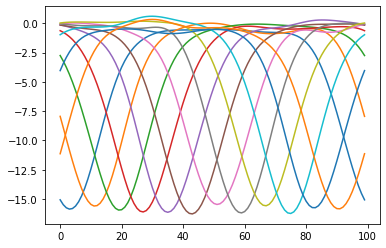

In [90]:
for i in range(schoups_net.simple_number):
    plt.plot(schoups_net.initial_tuning_curves[i, 1, 12, 12, :])

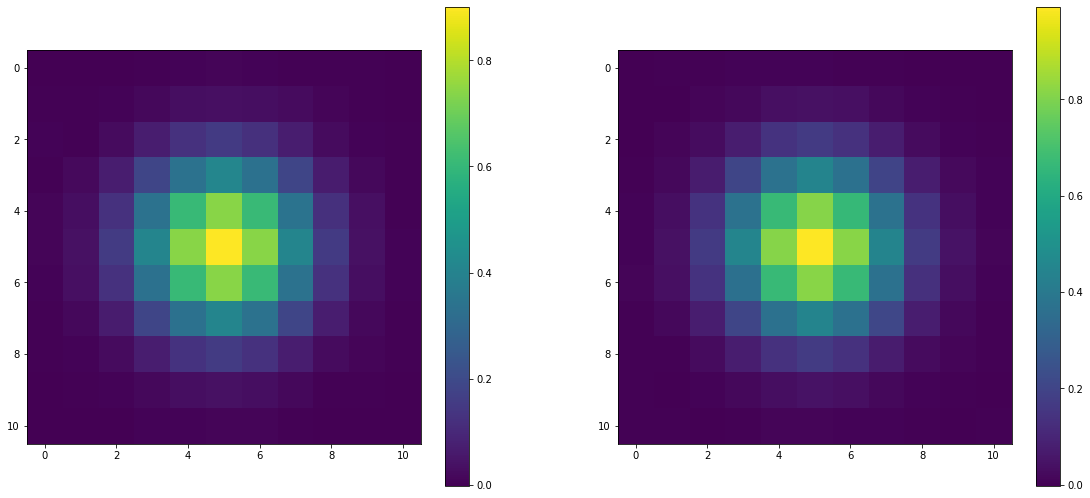

In [162]:
plt.figure(figsize = [30, 30])
difference = False

plt.subplot(3, 3, 1)
# schoups_net.plot_v4_tuning_curve(position = 1, differences = difference)
plt.imshow(schoups_net.v4_weight[0, 15, 1, 1, :].reshape(11, 11).detach().numpy())
plt.colorbar()

plt.subplot(3, 3, 2)
# ghose_net.plot_v4_tuning_curve(position = 1, differences = difference)
plt.imshow(schoups_net.v4_weight[1, 0, 1, 1, :].reshape(11, 11).detach().numpy())
plt.colorbar()

0.004666666666666597


array([-1.56079633, -1.36511345, -1.16943058, -0.9737477 , -0.77806483,
       -0.58238196, -0.38669908, -0.19101621,  0.00466667,  0.20034954,
        0.39603242,  0.59171529,  0.78739816,  0.98308104,  1.17876391,
        1.37444679])

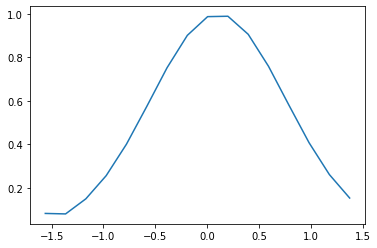

In [30]:
v1_angles = schoups_net.remove_ambiguous_stimuli(-np.pi/2, np.pi/2, 16, even_space = True) 
angles = schoups_net.remove_ambiguous_stimuli(-np.pi/2, np.pi/2, 8, even_space = True) 
a, b = schoups_net.sort_lists(np.roll(v1_angles, -1), schoups_net.generate_gaussian(angles[4], 0.7, 16))
print(v1_angles[8])
plt.plot(v1_angles, b)
v1_angles

In [28]:
v1_angles = schoups_net.remove_ambiguous_stimuli(-np.pi/2, np.pi/2, 16, even_space = True) 
v1_angles, [i*180/np.pi for i in v1_angles[np.ix_(*[range(0,i,2) for i in v1_angles.shape])]]

(array([-1.56079633, -1.36511345, -1.16943058, -0.9737477 , -0.77806483,
        -0.58238196, -0.38669908, -0.19101621,  0.00466667,  0.20034954,
         0.39603242,  0.59171529,  0.78739816,  0.98308104,  1.17876391,
         1.37444679]),
 [-89.42704220486918,
  -67.00343657755329,
  -44.5798309502374,
  -22.156225322921507,
  0.26738030439438015,
  22.690985931710266,
  45.11459155902616,
  67.53819718634203])

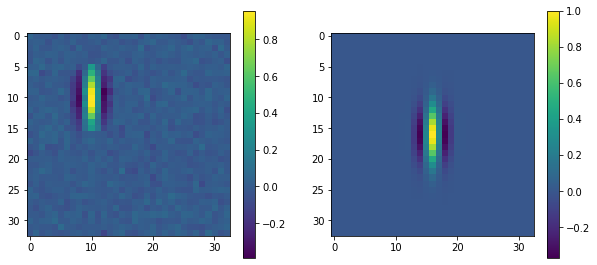

In [61]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
kernel = schoups_net.generate_location_gabor(np.pi/360, 0, 5, 5, 5, random_sf = False) 
plt.imshow(kernel.view(33, 33))
plt.colorbar()

plt.subplot(2, 2, 2)
kernel2 = schoups_net.generate_gabor(33, np.pi/360, 0, 5)
plt.imshow(kernel2.view(33, 33))
plt.colorbar()

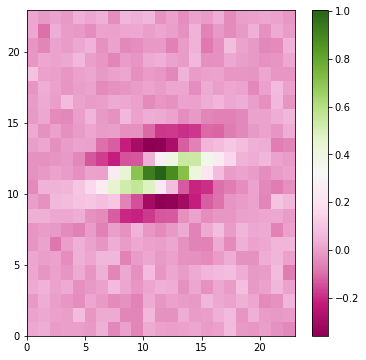

In [11]:
plt.figure(figsize = [6, 6])
plt.pcolormesh(test.before_v1weight.view(128, 47, 47, 529)[8, 0, 0, :].view(23, 23).detach().numpy(), cmap = 'PiYG')
plt.colorbar()

In [2]:
np.linspace(-90+180/64, 90-180/64, 32)

array([-87.1875, -81.5625, -75.9375, -70.3125, -64.6875, -59.0625,
       -53.4375, -47.8125, -42.1875, -36.5625, -30.9375, -25.3125,
       -19.6875, -14.0625,  -8.4375,  -2.8125,   2.8125,   8.4375,
        14.0625,  19.6875,  25.3125,  30.9375,  36.5625,  42.1875,
        47.8125,  53.4375,  59.0625,  64.6875,  70.3125,  75.9375,
        81.5625,  87.1875])

In [20]:
test = LCN_model.LCN(
    input_size = 33, v1_size = 11, v1_orientation_number = 32, v4_size = 11, v4_stride = 6, 
    v4_orientation_number = 16, phis_sfs = 4, training_size = 20, phis = True, sfs = False, alpha = 0.01, v1_rescale = 0.01, phase_rescale = 0.01, v4_rescale = 0.05)
test.tuning_curve_sample = 100
test.v1_tuning_curve()
test.v4_tuning_curve()

100%|██████████| 100/100 [05:19<00:00,  3.19s/it]


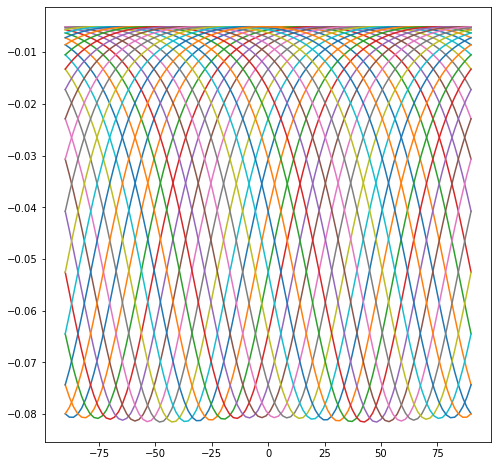

In [24]:
plt.figure(figsize = [8, 8])
for i in range(32):
#     plt.plot(test.initial_tuning_curves[i, 0, 11, 11, :]);
    plt.plot(np.linspace(-np.pi/2, np.pi/2, 100) * 180/np.pi, test.initial_tuning_curves[i, 3, 11, 11, :])

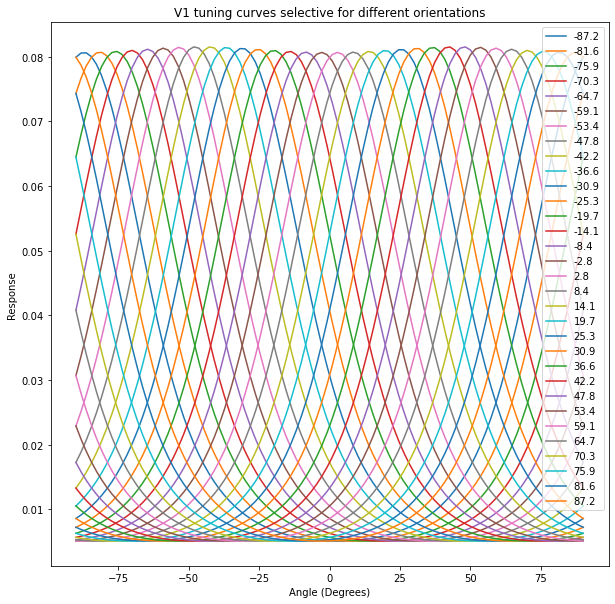

In [12]:
plt.figure(figsize = [10, 10])
test.plot_v1_tuning_curve(orientation = 3, phi_sf = 0, position = 11, orientations = True, differences = False)

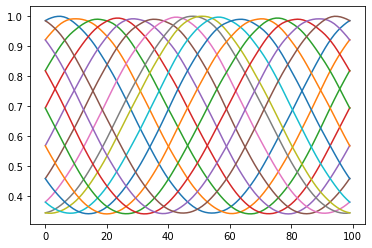

In [87]:
for i in range(16):
    plt.plot(schoups_net.v4_initial_tuning_curves[i, 1, 1, :])

In [58]:
list((5,) * 3)

[5, 5, 5]

In [89]:
net.trained_sfs

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

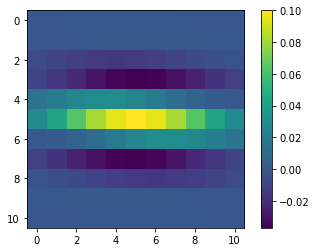

In [10]:
plt.imshow((test.simple_weight[0][0][0][0][0].view(11, 11)).detach().numpy())
plt.colorbar()
# (test.simple_weight[0][0][0][0][0].view(11, 11))

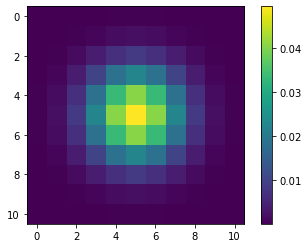

In [43]:
plt.imshow(test.v4_weight[0][0][0][0].view(11, 11).detach().numpy())
plt.colorbar()

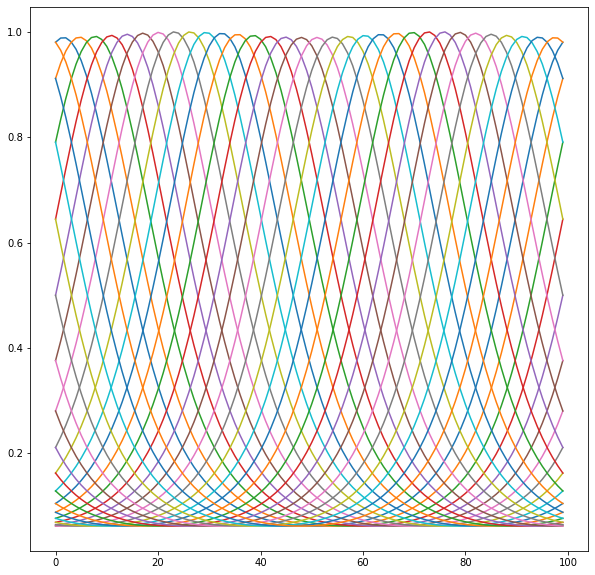

In [23]:
plt.figure(figsize = (10, 10))
for i in range(32):
    plt.plot(schoups_net.initial_tuning_curves[i, 0, 11, 11, :]);

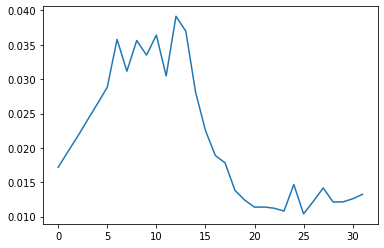

In [25]:
plt.plot((schoups_net.v1_mean_after_slopes))

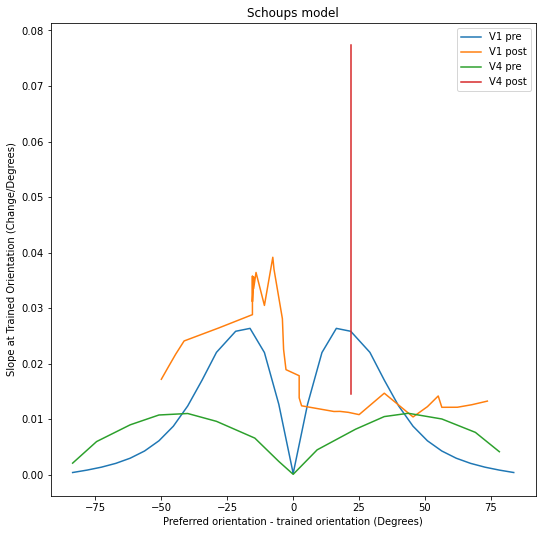

In [32]:
test.angle1 = -np.pi/60
test.angle2 = np.pi/60
plt.figure(figsize = [40, 40])

plt.subplot(4, 4, 1)
schoups_net.otc_curve(v1_position = 11, v4_position = 1)
test.otc_curve(v1_position = 11, v4_position = 1)
schoups_net.plot_otc_curve()
plt.title("Schoups model");


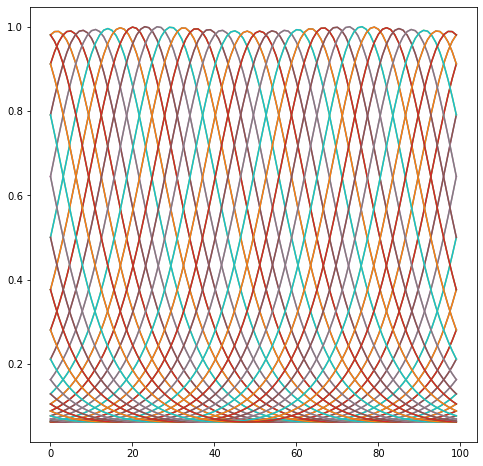

In [61]:
plt.figure(figsize = [8, 8])
for i in range(32):
    plt.plot(test.initial_tuning_curves[i, 0, 11, 11, :]);
    plt.plot(schoups_net.initial_tuning_curves[i, 0, 11, 11, :])

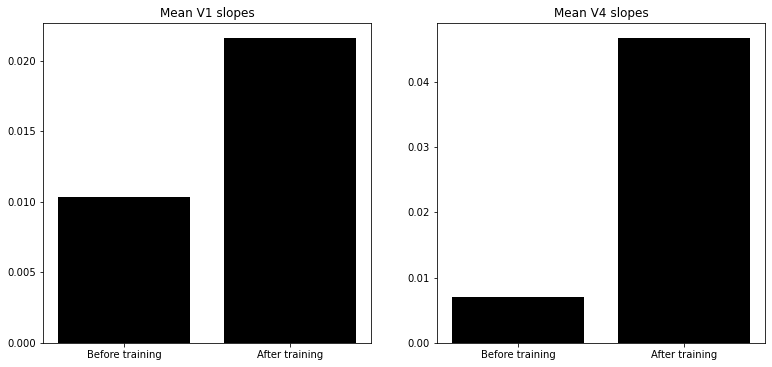

In [19]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)
plt.bar(["Before", "After"], [
    schoups_net.v1_mean_before_slope, schoups_net.v1_mean_after_slope], color = "black");
plt.title("Mean V1 slopes");

plt.subplot(3, 3, 2)
plt.bar(["Before", "After"], [
    schoups_net.v4_mean_before_slope, schoups_net.v4_mean_after_slope], color = "black");
plt.title("Mean V4 slopes");

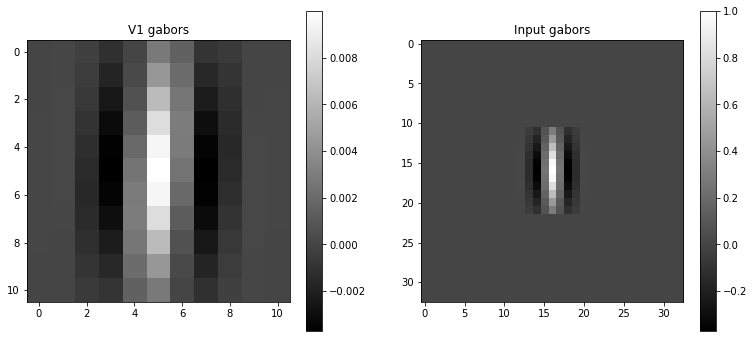

In [9]:
plt.figure(figsize = [20, 20])

plt.subplot(3, 3, 1)

kernel = test.simple_weight[0, 64, 0, 11, 11, :].view(11, 11).detach().numpy()
plt.imshow(kernel, 'gray')
plt.colorbar()
plt.title("V1 gabors");

plt.subplot(3, 3, 2)

kernel = test.generate_location_gabor(0, 0, 5, 11, 11).view(33, 33).detach().numpy()
kernel = kernel
plt.imshow(kernel, 'gray')
plt.colorbar()
plt.title("Input gabors");


In [40]:
a = list(np.random.rand(10))
np.max([i for i in a if i>0.5])

0.9836511389939092

In [50]:
grid = torch.zeros(5, 5)
grid[4][4] = 2
grid

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2.]])

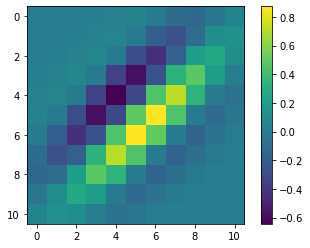

In [31]:
plt.imshow(test.generate_gabor(test.v1_size, np.pi/4, test.phis_sfs_range[1], 5).view(test.v1_size, test.v1_size))
plt.colorbar()

In [27]:
a = [1, 2, 3, 4]
b = [2, 3, 4, 5]
for i in range(len(a)):
    print(a[i], b[i])

1 2
2 3
3 4
4 5


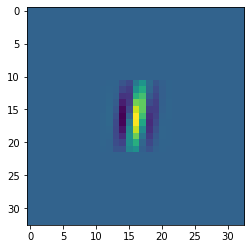

In [46]:
plt.imshow(schoups_net.transfer_inputting(-np.pi/4, np.pi/4, 11, 11, random_sf = False)[11][0])